### <font size=6>**Lending Club Case Study**</font>
***

#### <font color='#000080' size=5>***Introduction:***</font>

</br>
<font size=3 font-family:"Calibri">
Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
</font>

#### <font color='#000080' size=5>***Objective:***</font>
</br>
<font size=3> Identify driving factors behind loan default using EDA, which can be used by lending company for risk assessment when a loan application is received. </font>

#### <font color='#000080' size=5>***1. Data Sourcing:***</font>

#### <font color='black' size=3.2>1.1 Import required libraries</font>

In [849]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 50

#### <font color='black' size=3.2>1.2 Load loan data to pandas dataframe from CSV file</font>

In [850]:
#First parameter for read_csv in the below command specifies the path of loan.csv file that serves as source of data
loan_df = pd.read_csv("C:\Rajani\EPGP-ML_AI\CaseStudy\LendingClubCaseStudy\loan.csv", engine='python')

#### <font color='black' size=3.2>1.3 Understanding dataset</font>

In [851]:
pd.options.display.max_columns = 5
print(loan_df.head())

        id  member_id  ...  total_bc_limit  total_il_high_credit_limit
0  1077501    1296599  ...             NaN                         NaN
1  1077430    1314167  ...             NaN                         NaN
2  1077175    1313524  ...             NaN                         NaN
3  1076863    1277178  ...             NaN                         NaN
4  1075358    1311748  ...             NaN                         NaN

[5 rows x 111 columns]


In [852]:
print(loan_df.shape)

(39717, 111)


In [853]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


> <font color='#006400' size=4.8><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> - Loan dataset has 39717 rows and 111 columns </font>
> </br> 
> <font size=3.5> - Datatype of most of the variables are correctly mapped </font>
> </br> 

#### <font color='#000080' size=5>***2. Data Cleaning:***</font>

#### <font color='black' size=3.4>2.1 Missing Values</font>

#### <font color='#52595D' size=3.2>2.1.1 Drop the columns which is NA for more than 80% of rows in the given dataset</font>

In [854]:
def null_values(df):
    return round( (df.isnull().sum()*100 / len(df)).sort_values(ascending=False) )

In [855]:
null_columns_80_perct = null_values(loan_df)[ null_values(loan_df) > 80 ]

In [856]:
null_columns_80_perct

verification_status_joint         100.0
annual_inc_joint                  100.0
mo_sin_old_rev_tl_op              100.0
mo_sin_old_il_acct                100.0
bc_util                           100.0
bc_open_to_buy                    100.0
avg_cur_bal                       100.0
acc_open_past_24mths              100.0
inq_last_12m                      100.0
total_cu_tl                       100.0
inq_fi                            100.0
total_rev_hi_lim                  100.0
all_util                          100.0
max_bal_bc                        100.0
open_rv_24m                       100.0
open_rv_12m                       100.0
il_util                           100.0
total_bal_il                      100.0
mths_since_rcnt_il                100.0
open_il_24m                       100.0
open_il_12m                       100.0
open_il_6m                        100.0
open_acc_6m                       100.0
tot_cur_bal                       100.0
tot_coll_amt                      100.0


In [857]:
len(null_columns_80_perct)

56

In [858]:
#Drop these columns
loan_df.drop(columns=null_columns_80_perct.index, inplace=True)

In [859]:
loan_df.shape

(39717, 55)

#### <font color='52595D' size=3.2>2.1.2 Analyze columns with missing values more than 30%</font>

In [860]:
null_columns_30_perct = null_values(loan_df)[ null_values(loan_df) > 30 ]

In [861]:
null_columns_30_perct

mths_since_last_delinq    65.0
desc                      33.0
dtype: float64

In [862]:
#mths_since_last_delinq is the number of months since the borrower's last delinquecncy. So we can impute this value to 0 for missing values
loan_df.loc[loan_df['mths_since_last_delinq'].isnull(),'mths_since_last_delinq']=0

In [863]:
#desc is the loan description provided by the borrower. It has wide range of text values which dosen't have impact on Target variable. Hence dropping this column
loan_df.drop(columns=['desc'], inplace=True)

#### <font color='52595D' size=3.2>2.1.3 Find the columns with missing values</font>

In [864]:
loan_df.isnull().sum()[loan_df.isnull().sum() > 0].sort_values(ascending=False)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
dtype: int64

In [865]:
#emp_title - doesnot specify the job title rather organization name is given in this field, which has wide range of values. Since this doesn't have imapct on target variable, dropping this column
loan_df.drop(columns=['emp_title'], inplace=True)

In [866]:
#emp_length - since this is a probable driving factor do not impute the value. Delete the rows where emp_length is missing
loan_df = loan_df [loan_df['emp_length'].notnull()] 

In [867]:
#pub_rec_bankruptcies is the number of public record bankrupties. Since value 0 in this column indicates no bankrupties, we cannot impute the value 0. Leave this column as-is

In [868]:
#last_pymnt_d analysis
lastpayment_missing_df = loan_df[loan_df['last_pymnt_d'].isnull()]
lastpayment_missing_df.groupby('loan_status').size()
#As we could see for all the records where last payment date is not recorded, it is the defaulter who has not paid the amount. This is valid and hence not imputing data OR removing null value records

loan_status
Charged Off    66
dtype: int64

In [869]:
#revol_util analysis
revolvingUtil_missing_df = loan_df[loan_df['revol_util'].isnull()]
revolvingUtil_missing_df.groupby('revol_bal').size()

revol_bal
0        46
49238     1
dtype: int64

In [870]:
#As we could see majority of records are with revol_bal 0 which ideally means revol_util is 0%. So impute these records with value 0.
#Drop the other row (with revol_bal=49238)
loan_df.loc[(loan_df['revol_util'].isnull()) & (loan_df['revol_bal']==0), 'revol_util']="0.0%"
loan_df = loan_df[~( (loan_df['revol_util'].isna()) & (loan_df['revol_bal'] > 0) )]

In [871]:
#collections_12_mths_ex_med
loan_df.groupby('collections_12_mths_ex_med')['collections_12_mths_ex_med'].size()
# Since this parameter has single value 0.0 for all the rows, this will not impact target variable. Hence ignoring the missing values in this column

collections_12_mths_ex_med
0.0    38585
Name: collections_12_mths_ex_med, dtype: int64

In [872]:
#chargeoff_within_12_mths
loan_df.groupby('chargeoff_within_12_mths')['chargeoff_within_12_mths'].size()
# Since this parameter has single value 0.0 for all the rows, this will not impact target variable. Hence ignoring the missing values in this column

chargeoff_within_12_mths
0.0    38585
Name: chargeoff_within_12_mths, dtype: int64

In [873]:
#tax_liens
loan_df.groupby('tax_liens')['tax_liens'].size()
# Since this parameter has single value 0.0 for all the rows, this will not impact target variable. Hence ignoring the missing values in this column

tax_liens
0.0    38602
Name: tax_liens, dtype: int64

In [874]:
loan_df[['title','purpose']].head(10)
#Since 'purpose'column has more segregated values, we will not use title for our analysis and hence not imputing any value for this column

,title,purpose
0,Computer,credit_card
1,bike,car
2,real estate business,small_business
3,personel,other
4,Personal,other
5,My wedding loan I promise to pay back,wedding
6,Loan,debt_consolidation
7,Car Downpayment,car
8,Expand Business & Buy Debt Portfolio,small_business
9,Building my credit history.,other


In [875]:
#last_credit_pull_d - Ignore this since only 2 rows has missing values, which can be genuinely blank

In [876]:
#Find the status of missing value now
loan_df.isnull().sum()[loan_df.isnull().sum() > 0].sort_values(ascending=False)

pub_rec_bankruptcies          697
last_pymnt_d                   66
collections_12_mths_ex_med     56
chargeoff_within_12_mths       56
tax_liens                      39
title                          10
last_credit_pull_d              2
dtype: int64

#### <font color='52595D' size=3.2>2.1.4 Delete Empty rows</font>

In [877]:
loan_df.shape

(38641, 53)

In [878]:
loan_df = loan_df.dropna(how="all")

In [879]:
loan_df.shape

(38641, 53)

In [880]:
#No rows found with all the values missing

#### <font color='black' size=3.4>2.2 Delete Duplicate Rows</font>

#### <font color='52595D' size=3.2>2.2.1 Remove Duplicate rows if present</font>

In [881]:
loan_df.drop_duplicates(inplace=True)

In [882]:
loan_df.shape

(38641, 53)

In [883]:
#No Duplicate records found

#### <font color='black' size=3.4>2.3 Remove Unnecessary columns</font>

In [884]:
# id - not required
# pymnt_plan -  fixed value 'n' for all rows
# url - not useful
# title - Wide range of distinct text values. Since 'purpose' column has more refined info, title can be dropped
# mths_since_last_delinq - does not impact target variable
# initial_list_status - fixed value 'f' for all records
# collections_12_mths_ex_med - single valued
# policy_code - single valued
# acc_now_delinq - single valued
# chargeoff_within_12_mths - single valued
# delinq_amnt - single valued
# tax_liens - single valued
# application_type - single valued
columnsToDrop=['id','pymnt_plan','url','title','mths_since_last_delinq','initial_list_status',
               'collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths',
               'delinq_amnt','tax_liens','application_type']
loan_df.drop(columnsToDrop,axis=1,inplace=True)

In [885]:
loan_df.shape

(38641, 40)

#### <font color='black' size=3.4>2.4 Split columns for better analysis</font>

In [886]:
#issue_d can be subdivided into issue_month and issue_year

from datetime import datetime

def mdy_to_ymd(d):
   return datetime.strptime(d, '%b-%y').strftime('%Y-%m-%d')

loan_df["issue_date"]=loan_df["issue_d"].apply(mdy_to_ymd)
loan_df['issue_date'] =  pd.to_datetime(loan_df['issue_date'],format = '%Y-%m-%d')
loan_df['issue_date'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_date, dtype: datetime64[ns]

In [887]:
loan_df['issue_month']=loan_df['issue_date'].dt.month
loan_df['issue_year']=loan_df['issue_date'].dt.year

In [888]:
loan_df[['issue_d', 'issue_month','issue_year']]

,issue_d,issue_month,issue_year
0,Dec-11,12,2011
1,Dec-11,12,2011
2,Dec-11,12,2011
3,Dec-11,12,2011
4,Dec-11,12,2011
...,...,...,...
39712,Jul-07,7,2007
39713,Jul-07,7,2007
39714,Jul-07,7,2007
39715,Jul-07,7,2007


In [889]:
loan_df.shape

(38641, 43)

#### <font color='black' size=3.4>2.5 Standardizing values</font>

In [890]:
# int_rate - remove % and convert to numeric value
loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate'].apply(lambda x:x.split('%')[0]))
loan_df['int_rate'].dtype

dtype('float64')

In [891]:
# revol_util - remove % and convert to numeric value
loan_df['revol_util'] = pd.to_numeric(loan_df['revol_util'].apply(lambda x:x.split('%')[0]))
loan_df['revol_util'].dtype

dtype('float64')

In [892]:
# emp_length - As per the data description, emp_length should be 0 for < 1year and 10 for 10 years and above
loan_df['emp_length'] = pd.to_numeric(loan_df['emp_length'].apply(lambda x: 0 if "< 1 year" in x else (10 if "10+ years" in x else x.split()[0])))

In [893]:
loan_df['emp_length'].head()

0    10
1     0
2    10
3    10
4     1
Name: emp_length, dtype: int64

#### <font color='black' size=3.4>2.6 Remove Outliers</font>

#### <font color='#52595D' size=3.2>2.6.1 Check for outliers in Categorical columns</font>

In [894]:
#Remove records with loan_status='Current' as the loan provided is currently running and we cannot deduce anything from these records
loan_df = loan_df[loan_df['loan_status'] != 'Current']

In [895]:
#--------------------purpose
loan_purpose_values = loan_df['purpose'].value_counts()*100/loan_df.shape[0]
loan_purpose_values

purpose
debt_consolidation    47.079349
credit_card           13.049037
other                  9.887329
home_improvement       7.418161
major_purchase         5.540314
small_business         4.554777
car                    3.856911
wedding                2.431878
medical                1.747330
moving                 1.470314
house                  0.942919
vacation               0.926937
educational            0.844365
renewable_energy       0.250380
Name: count, dtype: float64

In [896]:
# remove rows with less than 1% of values under particular 'purpose'
purpose_values_to_drop = ['house','vacation','educational','renewable_energy']
loan_df = loan_df[~(loan_df['purpose'].isin(purpose_values_to_drop))]

In [897]:
#--------------------home_ownership
home_ownership_values = loan_df['home_ownership'].value_counts()*100/loan_df.shape[0]
home_ownership_values

home_ownership
RENT        47.894592
MORTGAGE    44.466099
OWN          7.375789
OTHER        0.255284
NONE         0.008235
Name: count, dtype: float64

In [898]:
# remove rows with less than 1% of value counts
home_ownership_values_to_drop = ['OTHER','NONE']
loan_df = loan_df[~(loan_df['home_ownership'].isin(home_ownership_values_to_drop))]

In [899]:
#--------------------Verification status
verification_status_values = loan_df['verification_status'].value_counts()*100/loan_df.shape[0]
verification_status_values
# No outliers found for this parameter

verification_status
Not Verified       43.141410
Verified           31.507679
Source Verified    25.350911
Name: count, dtype: float64

#### <font color='#52595D' size=3.2>2.6.2 Check for outliers in Numerical columns</font>

In [900]:
pd.options.display.max_columns = 50
loan_df[['loan_amnt','funded_amnt','funded_amnt_inv',
         'annual_inc','installment','dti','revol_bal',
         'revol_util','total_acc','total_pymnt']].describe().applymap(lambda x: f"{x:0.2f}")

,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,installment,dti,revol_bal,revol_util,total_acc,total_pymnt
count,36334.00,36334.00,36334.00,36334.00,36334.00,36334.00,36334.00,36334.00,36334.00,36334.00
mean,11201.09,10933.36,10368.46,69521.76,326.81,13.35,13494.38,49.10,22.14,12052.45
std,7355.83,7097.60,7035.94,65014.79,208.83,6.65,15947.88,28.27,11.41,8840.53
min,500.00,500.00,0.00,4080.00,15.69,0.00,0.00,0.00,2.00,0.00
25%,5500.00,5500.00,5000.00,41328.75,168.92,8.23,3810.00,25.90,14.00,5613.23
50%,10000.00,9700.00,8975.00,60000.00,282.50,13.45,8987.50,49.60,20.00,9905.71
75%,15000.00,15000.00,14284.73,83000.00,431.77,18.60,17143.00,72.60,29.00,16369.62
max,35000.00,35000.00,35000.00,6000000.00,1305.19,29.99,149588.00,99.90,90.00,58563.68


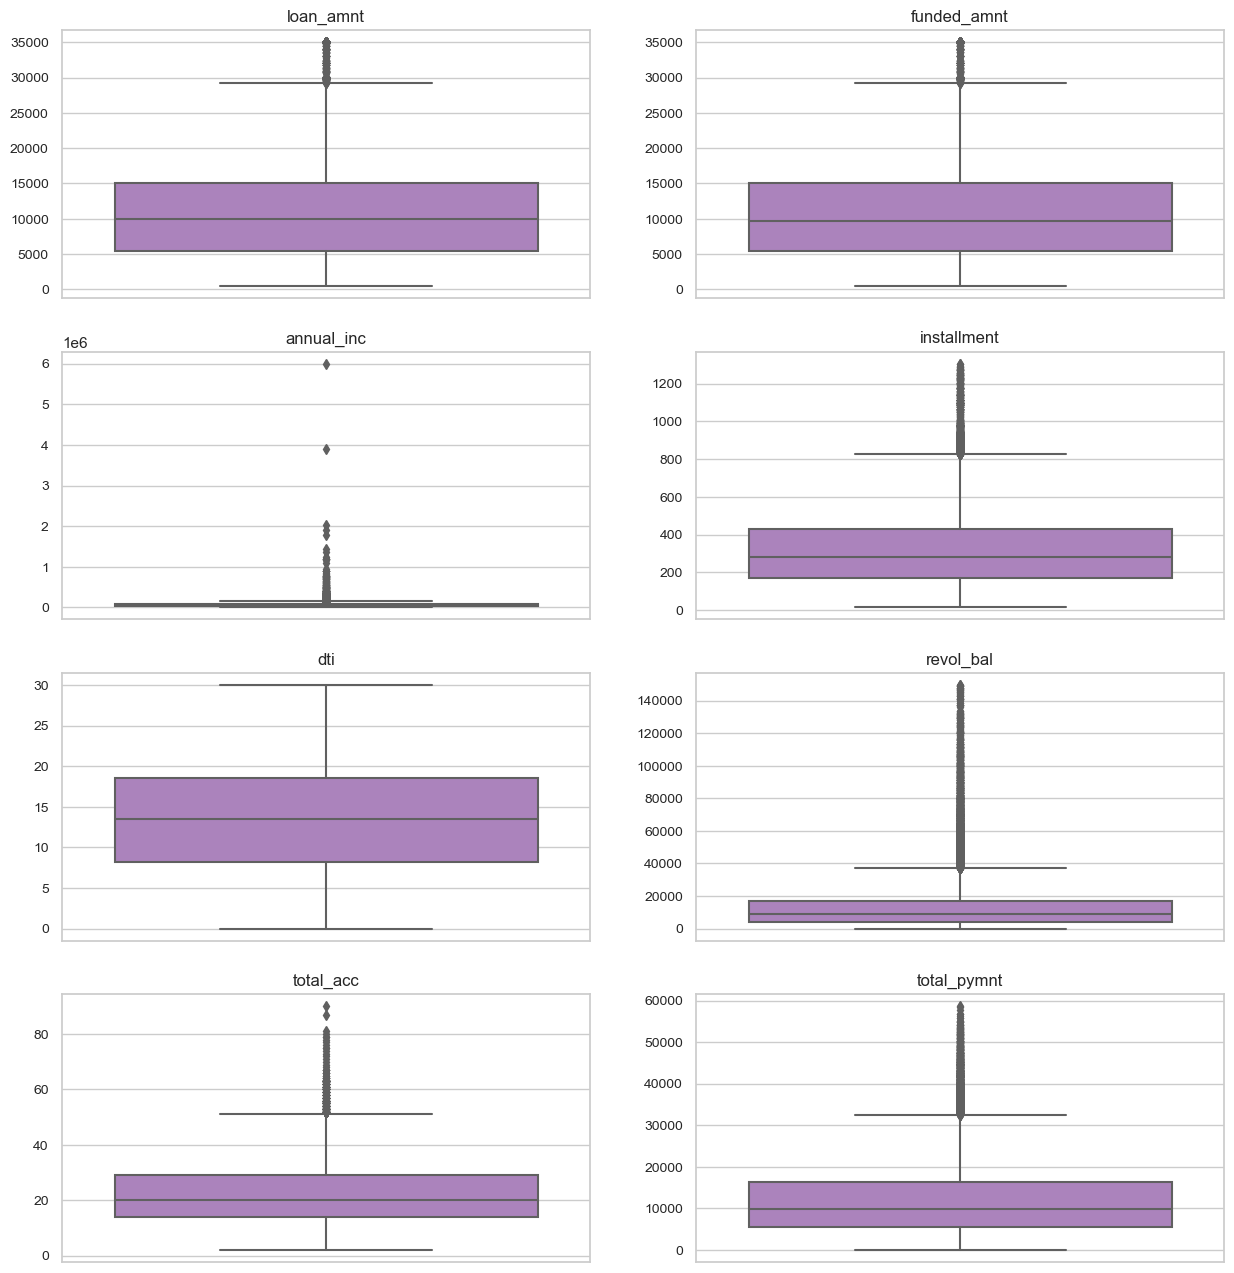

In [901]:
import itertools
outlier_col_names_to_check = ['loan_amnt','funded_amnt','annual_inc','installment','dti','revol_bal','total_acc','total_pymnt']

plt.figure(figsize=[15,16])
for i,j in itertools.zip_longest(outlier_col_names_to_check, range(len(outlier_col_names_to_check))):
    plt.subplot(4,2,j+1)
    g=sns.boxplot(y = loan_df[i], orient = "h", color = "#AF7AC5")
    plt.xlabel("")
    plt.ylabel("")
    g.tick_params(labelsize=10)
    plt.title(i, fontsize=12)

In [902]:
#revol_bal can be high if the payment is not made since long time. So not removing outliers for this variable

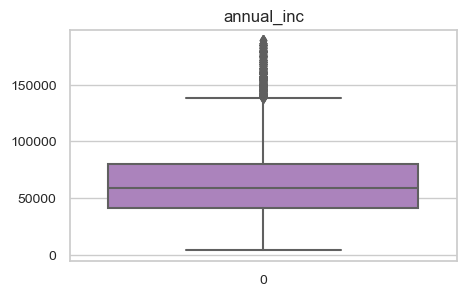

In [903]:
#Removing outliers in annual_inc 
plt.figure(figsize=[5,3])
annual_inc_98_perct= loan_df['annual_inc'].quantile(0.98)
loan_df = loan_df[loan_df['annual_inc'] <= annual_inc_98_perct]
g=sns.boxplot(loan_df['annual_inc'], color = "#AF7AC5")
plt.xlabel("")
plt.ylabel("")
g.tick_params(labelsize=10)
plt.title("annual_inc",fontsize=12)
plt.show()

> <font color='#006400' size=5 face="WildWest"><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> 1. Columns Dropped: </font>
</br>
> <font size=3>  - Columns with more than 80% missing values (56 coulumns) </font>
</br>
> <font size=3>  - Coulmns : desc, emp_title </font>
> </br> 
> </br> 
> <font size=3.5> 2. Columns imputed with default values: </font>
</br>
> <font size=3.5>  - mths_since_last_delinq - This is the number of months since the borrower's last delinquecncy. So we can impute this value to 0 for missing values</font>
</br>
> <font size=3.5>  - revol_util - Majority of the records where revol_util is missing, we see that revol_bal is 0, which ideally means revol_util is 0%. So impute these records with value 0.</font>
</br>
</br>
> <font size=3.5> 3. Delete rows where data is missing:</font>
</br>
> <font size=3.5>  - emp_length - since this is a probable driving factor not imputing the missing value. Instead, delete the rows where emp_length is missing</font>
</br>
> </br> 
> <font size=3.5> 4. No action taken:</font>
</br>
> <font size=3.5> - pub_rec_bankruptcies - is the number of public record bankrupties. Since value 0 in this column indicates no bankrupties, we cannot impute the value 0. Leave this column as-is</font>
</br>
> <font size=3.5> - last_pymnt_d - For all the records where last payment date is not recorded, it is the defaulter who has not paid the amount. This is valid and hence not imputing data OR removing null value records</font>
</br>
> <font size=3.5> - collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens, title, last_credit_pull_d - Since these records has single value for all non-null records, for the current analysis it cannot have any impact on target variable. Hence ignoring the missing values in this column.</font>
</br>
> </br> 
> <font size=3.5> 5. No records found with all the values missing</font>
</br>
> </br> 
> <font size=3.5> 6. No Duplicate records found</font>
</br> 
> </br> 
> <font size=3.5> 7. Remove unnecessary columns - 14 columns dropped</font>
</br>
</br>
> <font size=3.5> 8. Column split: issue_d can be subdivided into issue_month and issue_year</font>
> </br> 
> </br> 
> <font size=3.5> 9. Standardizing values:</font>
</br>
> <font size=3.5>  - int_rate - remove % and convert to numeric value </font>
</br>
> <font size=3.5>  - revol_util - remove % and convert to numeric value </font>
</br>
> <font size=3.5>  - emp_length - As per the data description, emp_length should be 0 for less than 1year and 10 for 10 years and above </font>
> </br> 
> </br> 
> <font size=3.5> 10. Removing outliers on Categorical variables:</font>
</br>
> <font size=3.5>  - purpose, home_ownership - remove rows with less than 1% of values</font>
> </br> 
</br>
> <font size=3.5> 11. Removing outliers in Numerical variables:</font>
</br>
> <font size=3.5>  - annual_inc </font>
> </br> 
</br>

#### <font color='#000080' size=5>***3. Derived Metrics:***</font>

In [904]:
#annual_inc - Create a new column called annual_inc_bin which will categorize annual income into the buckets of 10000
loan_df['annual_inc_bin'] = pd.cut(loan_df['annual_inc'], [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000], labels=['0-10k', '10k-20k','20k-30k', '30k-40k','40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k','90k-100k', '100k-110k','>110k' ])
loan_df.groupby('annual_inc_bin').size()

annual_inc_bin
0-10k          61
10k-20k       867
20k-30k      3046
30k-40k      4780
40k-50k      5379
50k-60k      5313
60k-70k      3913
70k-80k      3371
80k-90k      2414
90k-100k     1920
100k-110k    1171
>110k        1064
dtype: int64

In [905]:
#total_pymnt 
loan_df['total_pymnt_bin'] = pd.cut(loan_df['total_pymnt'], [0, 5000, 10000, 15000, 20000,25000], labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k'])
loan_df.groupby('total_pymnt_bin').size()

total_pymnt_bin
0-5k        7523
5k-10k     10633
10k-15k     7528
15k-20k     4320
20k-25k     2510
dtype: int64

In [906]:
#revol_bal
loan_df['revol_bal_bin'] = pd.cut(loan_df['revol_bal'], [0, 10000, 20000, 30000, 40000], labels=['0-10k', '10k-20k', '20k-30k', '30k-40k'])
loan_df.groupby('revol_bal_bin').size()

revol_bal_bin
0-10k      18593
10k-20k     9384
20k-30k     3602
30k-40k     1430
dtype: int64

In [907]:
#revol_util
loan_df['revol_util_bin'] = pd.cut(loan_df['revol_util'], [0, 10, 20, 30, 40,50,60,70,80, 90, 100], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
loan_df.groupby('revol_util_bin').size()

revol_util_bin
0-10      3084
10-20     3002
20-30     3405
30-40     3716
40-50     3937
50-60     3895
60-70     3876
70-80     3648
80-90     3339
90-100    2842
dtype: int64

In [908]:
#int_rate
loan_df['int_rate_bin'] = pd.cut(loan_df['int_rate'], [5, 10, 15, 20,25], labels=['5-10', '10-15', '15-20','20-25'])
loan_df.groupby('int_rate_bin').size()

int_rate_bin
5-10     11252
10-15    16951
15-20     6705
20-25      701
dtype: int64

In [909]:
#dti
loan_df['dti_bin'] = pd.cut(loan_df['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '5-10', '10-15', '15-20', '20-25','25-30'])
loan_df.groupby('dti_bin').size()

dti_bin
0-5      4267
5-10     7142
10-15    8939
15-20    8304
20-25    6233
25-30     579
dtype: int64

In [910]:
#loan_amnt
loan_df['funded_amnt_bin'] = pd.cut(loan_df['funded_amnt_inv'], [0, 5000, 10000, 15000, 20000, 25000,30000,35000], labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k'])
loan_df.groupby('funded_amnt_bin').size()

funded_amnt_bin
0-5k        9525
5k-10k     11927
10k-15k     7184
15k-20k     3731
20k-25k     2089
25k-30k      563
30k-35k      478
dtype: int64

In [911]:
#Calculate approved loan amount 
loan_df['approved_loan_amt_percent'] = round(loan_df['funded_amnt_inv']*100/loan_df['loan_amnt'],2)
loan_df['rejected_loan_amt_perct'] = 100 - loan_df['approved_loan_amt_percent'] 

In [912]:
loan_df['rejected_amount'] =round(loan_df['loan_amnt'] - loan_df['funded_amnt_inv'], 2)

In [913]:
#approved_loan_amt_bin - Create a new column called approved_loan_amt_bin which will categorize approved_loan_amt_percent into the buckets of 10
loan_df['rejected_loan_amt_bin'] = pd.cut(loan_df['rejected_loan_amt_perct'], [0, 10, 20, 30, 40,50,60,70,80, 90, 100], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
loan_df.groupby('rejected_loan_amt_bin').size()

rejected_loan_amt_bin
0-10      13701
10-20       927
20-30       616
30-40       986
40-50       404
50-60       238
60-70       226
70-80       279
80-90       327
90-100      386
dtype: int64

In [914]:
loan_df['loss_amnt'] = loan_df['funded_amnt_inv'] - loan_df['total_pymnt_inv']
loan_df['loss_amnt'] = loan_df['loss_amnt'].apply(lambda x: 0 if x<0 else x)

In [915]:
loan_df['installment_perct']= round( (( loan_df['installment'] / (loan_df['annual_inc'] / 12) ) * 100),0)
loan_df['installment_perct'].describe()

count    35609.000000
mean         6.640653
std          3.977815
min          0.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         32.000000
Name: installment_perct, dtype: float64

In [916]:
loan_df['installment_perct_bin'] = pd.cut(loan_df['installment_perct'], [0, 5, 10, 15, 20, 25, 30, 35], labels=['0-5', '5-10', '10-15', '15-20', '20-25','25-30','30-35'])
loan_df.groupby('installment_perct_bin').size()

installment_perct_bin
0-5      16368
5-10     13395
10-15     4668
15-20      999
20-25      118
25-30       15
30-35        1
dtype: int64

In [917]:
loan_df['Defaulter'] = loan_df['loan_status'].apply(lambda x: 0 if x == "Fully Paid" else 1)
loan_df[['Defaulter','loan_status']].head()

,Defaulter,loan_status
0,0,Fully Paid
1,1,Charged Off
2,0,Fully Paid
3,0,Fully Paid
5,0,Fully Paid


> <font color='#006400' size=4.8><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> Following Derived variables are created: </font>
</br>
> <font size=3.5> - annual_inc_bin - Categorize annual income into the buckets of 10000 </font>
</br>
> <font size=3.5> - total_pymnt_bin - Categorize total_pymnt into the buckets of 5000 </font>
</br>
> <font size=3.5> - revol_bal_bin - Categorize revol_bal into the buckets of 10000 </font>
</br>
> <font size=3.5> - revol_util_bin - Categorize revol_util into the buckets of 10 </font>
</br>
> <font size=3.5> - int_rate_bin - Categorize revol_util into the buckets of 5 </font>
</br>
> <font size=3.5> - dti_bin - Categorize dti into the buckets of 5 </font>
</br>
> <font size=3.5> - funded_amnt_bin - Categorize funded_amnt into the buckets of 5000 </font>
</br>
> <font size=3.5> - approved_loan_amt_percent - (funded_amnt_inv/loan_amnt)*100 </font>
</br>
> <font size=3.5> - rejected_loan_amt_perct - 100-approved_loan_amt_percent </font>
</br>
> <font size=3.5> - rejected_amount - loan_amnt - funded_amnt_inv </font>
</br>
> <font size=3.5> - rejected_loan_amt_bin - Categorize rejected_loan_amt_perct into the buckets of 10 </font>
</br>
> <font size=3.5> - loss_amnt - funded_amnt_inv-total_pymnt_inv </font>
</br>
> <font size=3.5> - installment_perct - (installment/ (annual_inc/12) )*100 </font>
</br>
> <font size=3.5> - installment_perct_bin - Categorize installment_perct into the buckets of 5 </font>
</br>
> <font size=3.5> - Defaulter - 0 for loan_status='Fully Paid' and 1 for loan_status='Charged off' </font>
</br>
</br>

#### <font color='#000080' size=5>***4. Univariate Analysis:***</font>

#### <font color='black' size=3.4>4.1 Univariate Analysis on Categorical Variables</font>

In [918]:
sns.set(style="whitegrid", color_codes=True)
#palette = sns.color_palette("crest")
#sns.set_palette(palette,n_colors=20)

#### <font color='#52595D' size=3.2>4.1.1 Analyze loan status and loan purpose</font>

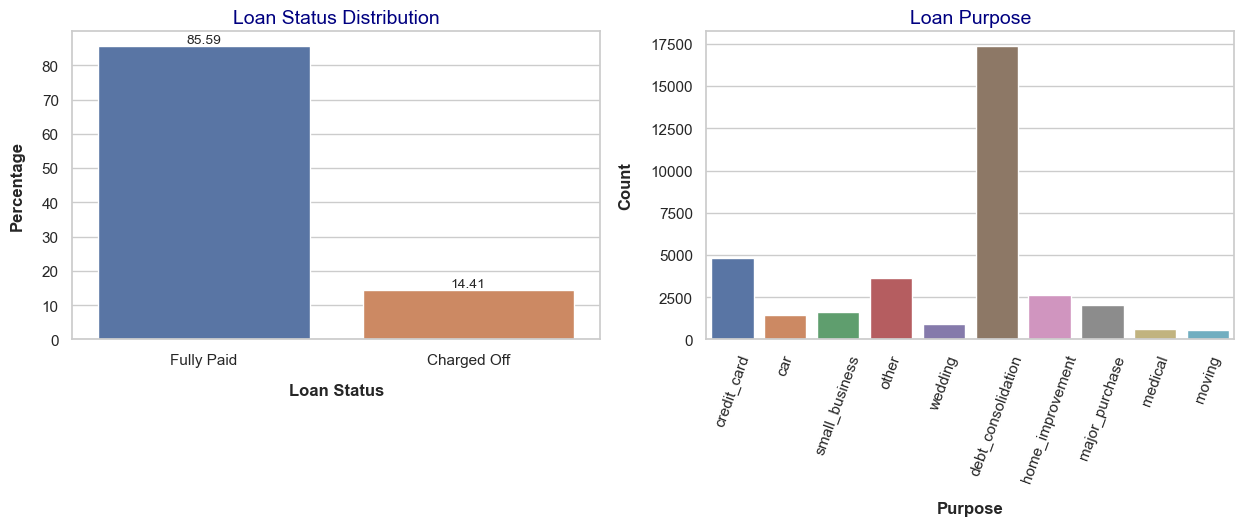

In [919]:
#---------------------------- Analyze loan status and loan purpose --------------------------

plt.figure(figsize=(15,4))

#Check the distribution of loan_status
#Setting subplot index
plt.subplot(1,2,1)
#Better to display values as percentages instead of count, so that we get clear indication of distribution
loanstatusdf = loan_df["loan_status"].value_counts(normalize=True).mul(100).round(2).reset_index()
barplotresult = sns.barplot(data=loanstatusdf, x="loan_status", y="proportion")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=10)
plt.xlabel("Loan Status",fontweight='bold')
plt.ylabel('Percentage',fontweight='bold')
plt.title('Loan Status Distribution',fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=14,labelpad=12)   
plt.rc('axes', labelsize=12,labelpad=12)  

#Check the distribution of Loan purpose
plt.subplot(1,2,2)
sns.countplot(data=loan_df, x='purpose')
plt.xticks(rotation=70)
plt.xlabel("Purpose", fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Loan Purpose',fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=14,labelpad=12)   
plt.rc('axes', labelsize=12,labelpad=12) 

plt.show()

In [920]:
#Observations: 
#From loan status data, we can say that 85% of the borrowers have fully paid the loan whereas around 15% are defaulters.
#From purpose data, we can say that most of them have taken loan for debt consolidation and paying credit card bills.

#### <font color='#52595D' size=3.2>4.1.2 Check borrowers distribution from various grades and sub-grades</font>

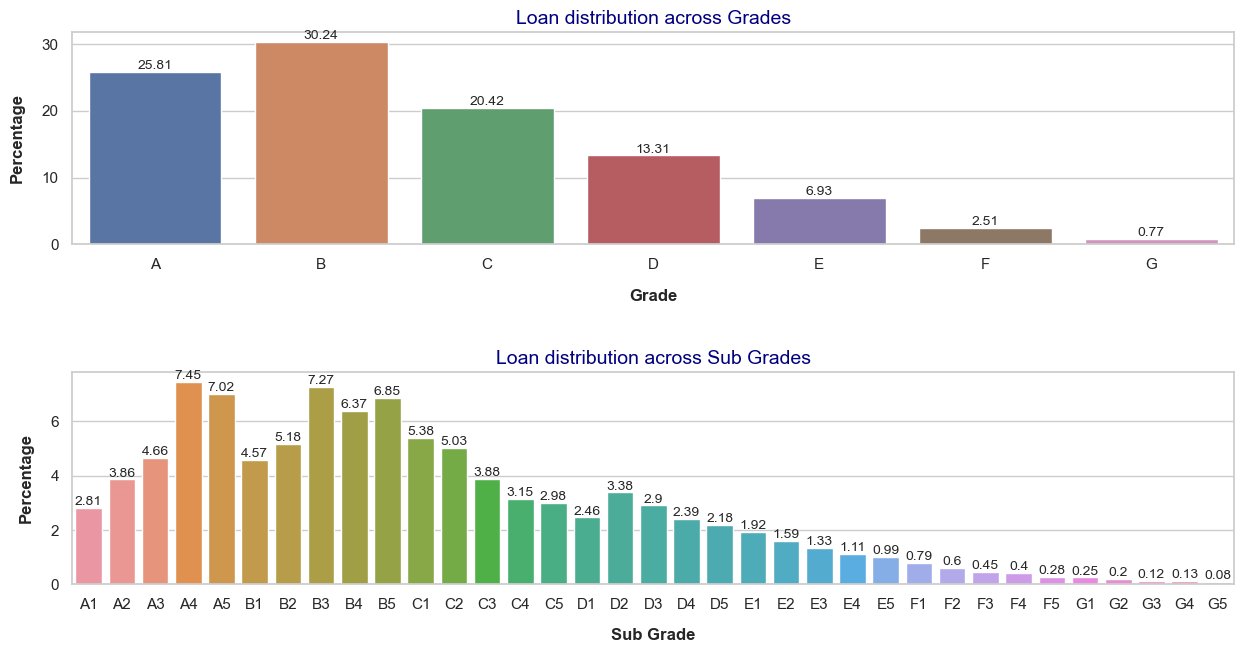

In [921]:
# ------------------- Check borrowers distribution from various grades and sub-grades categorized by lending company -------
#Setting up the figure size of the plot
plt.figure(figsize=(15,8))
plt.subplots_adjust(top = 0.70, bottom=0.01, hspace=0.6)


#Distribution of Grades
plt.subplot(2,1,1)
gradeList = list(loan_df.groupby('grade').groups.keys())
order_list = sorted(gradeList)
gradedf = loan_df["grade"].value_counts(normalize=True).mul(100).round(2).reset_index()
barplotresult = sns.barplot(data=gradedf, x="grade", y="proportion", order=order_list)

for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=10)
plt.xlabel("Grade",fontweight='bold')
plt.ylabel('Percentage',fontweight='bold')
plt.title('Loan distribution across Grades',fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=14,labelpad=12)   
plt.rc('axes', labelsize=12,labelpad=12)  

#Distribution of SubGrades
plt.subplot(2,1,2)
subgradeList = list(loan_df.groupby('sub_grade').groups.keys())
order_list = sorted(subgradeList)
subgradedf = loan_df["sub_grade"].value_counts(normalize=True).mul(100).round(2).reset_index()
barplotresult = sns.barplot(data=subgradedf, x="sub_grade", y="proportion", order=order_list)
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=10)
plt.xlabel("Sub Grade",fontweight='bold')
plt.ylabel('Percentage',fontweight='bold')
plt.title('Loan distribution across Sub Grades', fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=14,labelpad=12)   
plt.rc('axes', labelsize=12,labelpad=12)  

plt.show()

In [922]:
#Observations: 
#From the above plot, we see that loan approved to the borrowers in the category E,F and G grades are very less.

#### <font color='#52595D' size=3.2>4.1.3 Analyze loan borrowed in various months and years</font>

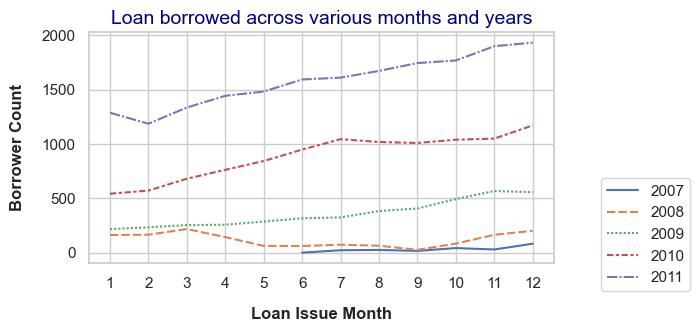

In [923]:
#-------------------------- Analyze loan borrowed in various months and years ------------------------
plt.figure(figsize=(6,3))
issueDate_df = pd.pivot_table(data=loan_df,index='issue_month', columns=['issue_year'], aggfunc='size')
ax = sns.lineplot(data=issueDate_df,  sort=False)

legend = plt.legend(bbox_to_anchor=(1.31,0.4)) 

ax.set(xticks=issueDate_df.index)
plt.xlabel("Loan Issue Month",fontweight='bold')
plt.ylabel('Borrower Count',fontweight='bold')
plt.title('Loan borrowed across various months and years', fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=14,labelpad=12)   
plt.rc('axes', labelsize=12,labelpad=12)  

plt.show()


In [924]:
#Observations: 
#From Issue year data, we can say that lending club has expanded year by year, every year the number of loans are almost doubled.
#December is the month with highest loan borrowed, possibly due to the holiday season.

#### <font color='#52595D' size=3.2>4.1.4 Analyze various Categorical variables</font>

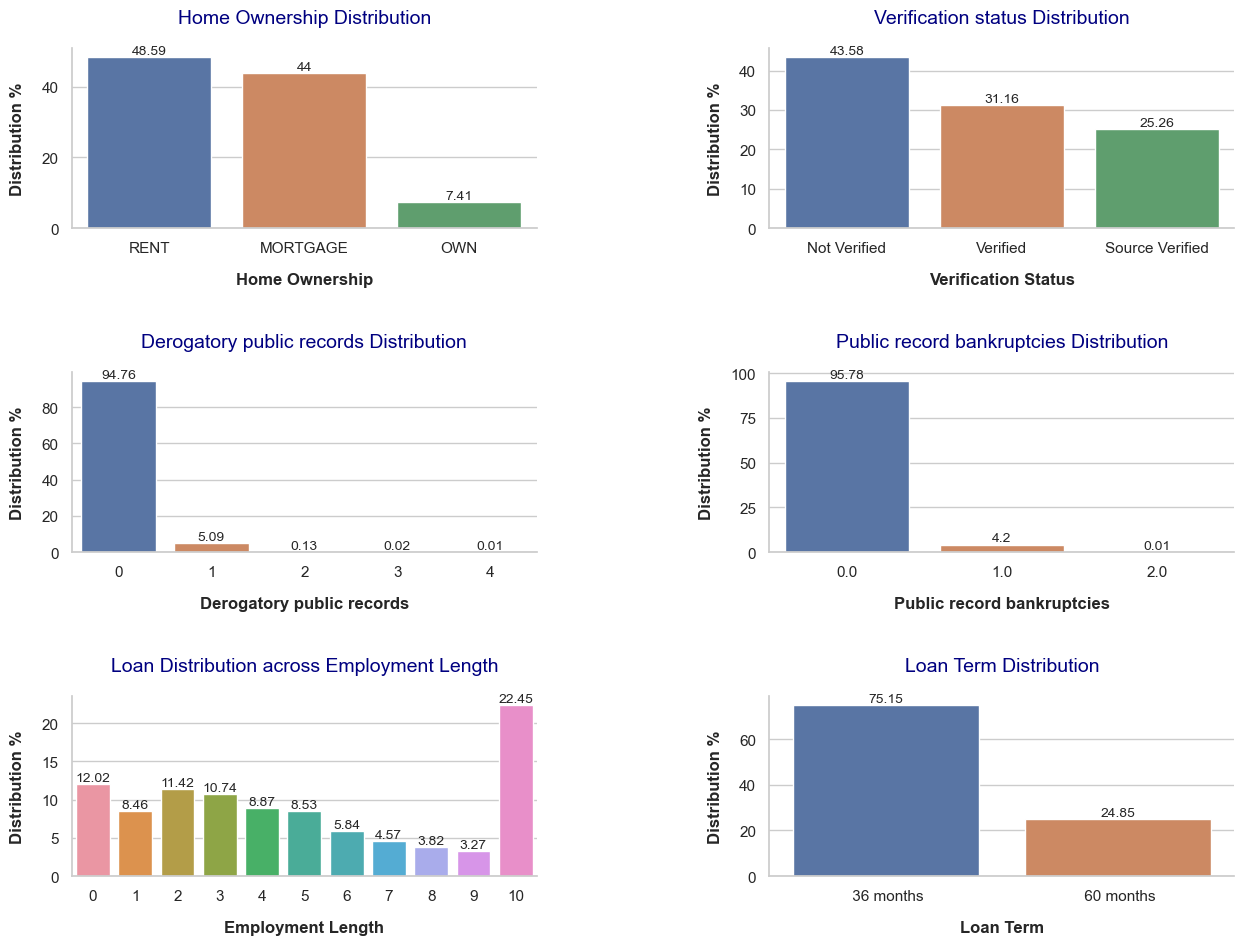

In [925]:
#--------------------------- Analyze various Categorical variables ------------------------
# home_ownership,verification_status, pub_rec, pub_rec_bankruptcies,emp_length, term


plt.figure(figsize=(15,12))
plt.subplots_adjust(top = 0.70, bottom=0.01, hspace=0.8, wspace=0.5)


#Check if home ownership has different distribution in loan 
#Better to display values as percentages instead of count, so that we get clear indication of distribution
#Setting subplot index
ax = plt.subplot(3,2,1)
homeowndf = loan_df["home_ownership"].value_counts(normalize=True).mul(100).round(2).reset_index()
barplotresult = sns.barplot(data=homeowndf, x="home_ownership", y="proportion")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=10)
plt.xlabel("Home Ownership",labelpad=12,fontweight='bold')
plt.ylabel('Distribution %',labelpad=12,fontweight='bold')
plt.rc('axes', titlesize=14)   
plt.rc('axes', labelsize=12)   
plt.title('Home Ownership Distribution',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

#Check the distribution of verification_status
plt.subplot(3,2,2)
verificationStatusdf = loan_df["verification_status"].value_counts(normalize=True).mul(100).round(2).reset_index()
barplotresult = sns.barplot(data=verificationStatusdf, x="verification_status", y="proportion")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=10)
plt.xlabel("Verification Status",labelpad=12,fontweight='bold')
plt.ylabel('Distribution %',labelpad=12,fontweight='bold')
plt.rc('axes', titlesize=14)   
plt.rc('axes', labelsize=12)   
plt.title('Verification status Distribution',pad=18,fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)


#Check the distribution of pub_rec
plt.subplot(3,2,3)
pub_rec_df = loan_df["pub_rec"].value_counts(normalize=True).mul(100).round(2).reset_index()
barplotresult = sns.barplot(data=pub_rec_df, x="pub_rec", y="proportion")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=10)
plt.xlabel("Derogatory public records",labelpad=12,fontweight='bold')
plt.ylabel('Distribution %',labelpad=12,fontweight='bold')
plt.title('Derogatory public records Distribution',pad=18,fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

#Check the distribution of pub_rec_bankruptcies
plt.subplot(3,2,4)
pub_rec_bankruptcies_df = loan_df["pub_rec_bankruptcies"].value_counts(normalize=True).mul(100).round(2).reset_index()
barplotresult = sns.barplot(data=pub_rec_bankruptcies_df, x="pub_rec_bankruptcies", y="proportion")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=10)
plt.xlabel("Public record bankruptcies",labelpad=12,fontweight='bold')
plt.ylabel('Distribution %',labelpad=12,fontweight='bold')
plt.rc('axes', titlesize=14)   
plt.rc('axes', labelsize=12)   
plt.title('Public record bankruptcies Distribution',pad=18,fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

#Check the distribution of emp_length
plt.subplot(3,2,5)
emp_length_df = loan_df["emp_length"].value_counts(normalize=True).mul(100).round(2).reset_index()
barplotresult = sns.barplot(data=emp_length_df, x="emp_length", y="proportion")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=10)
plt.xlabel("Employment Length",labelpad=12,fontweight='bold')
plt.ylabel('Distribution %',labelpad=12,fontweight='bold')
plt.rc('axes', titlesize=14)   
plt.rc('axes', labelsize=12)   
plt.title('Loan Distribution across Employment Length',pad=18,fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

#Check which term of loan has more borrowers
plt.subplot(3,2,6)
termdf = loan_df["term"].value_counts(normalize=True).mul(100).round(2).reset_index()
barplotresult = sns.barplot(data=termdf, x="term", y="proportion")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=10)
plt.xlabel("Loan Term",fontweight='bold')
plt.ylabel('Distribution %',fontweight='bold')
plt.rc('axes', titlesize=14,labelpad=12)   
plt.rc('axes', labelsize=12,labelpad=12)   
plt.title('Loan Term Distribution',pad=18,fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

plt.show()

In [926]:
#Observations: 
#From the above plot,we see that - 
# 1. Number of loans is very high under home ownership category Rent when compared to Mortgage. Own house is comparatively very less
# 2. Almost 43% of the loans is under 'Not verfied' category where in annual income of the borrower is not verified
# 3. Undoubtedly loan is given for borrower with no derogatory public records and no public record bankruptcies. Only very few exceptions can be seen.
# 4. As we could see number of loans for 10+ years of employment length is more than other categories.
# 5. Most of the borrowers would go for 36 months loan period (75%) rather than 60 months (25%)

#### <font color='black' size=3.4>4.2 Univariate Analysis on Numeric variables</font>

#### <font color='#52595D' size=3.2>4.2.1 Check the distribution of annual income range and loan amount funded</font>

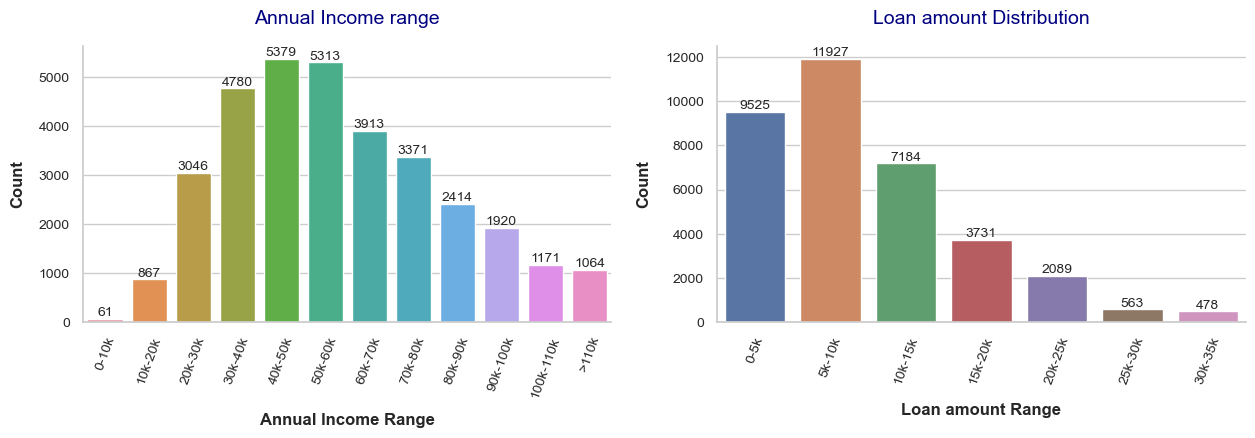

In [927]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top = 0.70, bottom=0.01, hspace=0.4, wspace =0.2)


#Check the distribution of borrowers with annual income range
#Setting subplot index
ax = plt.subplot(1,2,1)
barplotresult = sns.countplot(data=loan_df, x='annual_inc_bin')
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=10)
plt.xlabel("Annual Income Range",fontsize=12, labelpad=10,fontweight='bold')
plt.ylabel('Count',labelpad=10,fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.rc('axes', titlesize=12)   
plt.rc('axes', labelsize=10)   
plt.xticks(rotation=70)
plt.title('Annual Income range',pad=16, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)


#Check the distribution of borrowers with loan amount range
#Setting subplot index
ax = plt.subplot(1,2,2)
barplotresult = sns.countplot(data=loan_df, x='funded_amnt_bin')
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=10)
plt.xlabel("Loan amount Range",fontsize=12, fontweight='bold')
plt.ylabel('Count',labelpad=10,fontsize=12 ,fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=70)
plt.rc('axes', titlesize=12)   
plt.rc('axes', labelsize=10)   
plt.title('Loan amount Distribution',pad=16, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})

gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

plt.show()

In [928]:
#Observations:
# 1. Most of the borrowers annual income is in the range of 20k to 80 k
# 2. Most of the borrowers have taken loan between 5000 to 10000 

#### <font color='#52595D' size=3.2>4.2.2 Analyze amount distribution for loan_amt, funded_amnt, funded_amnt_inv</font>

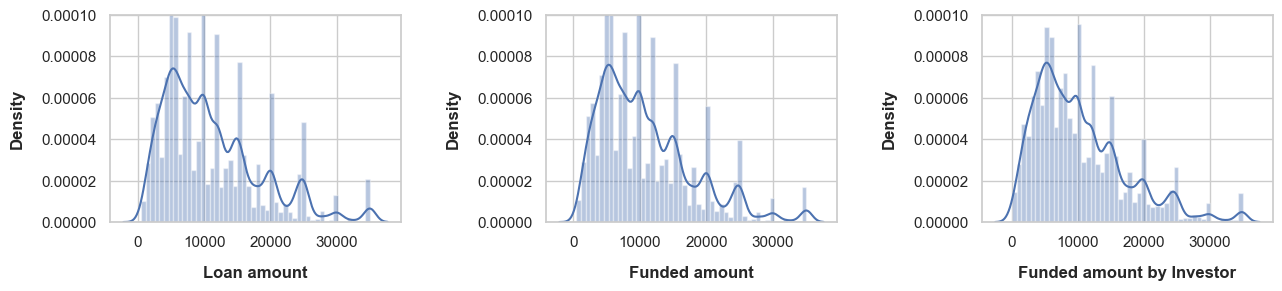

In [929]:
#---------------------------------- Analyze amount distribution for loan_amt, funded_amnt, funded_amnt_inv --------------

plt.figure(figsize=(15,3))
plt.subplots_adjust(top = 0.70, bottom=0.01, hspace=0.4, wspace=0.5)


plt.subplot(1,3,1)
sns.distplot(loan_df['loan_amnt'])
plt.xlabel("Loan amount",fontweight='bold',fontsize=12)
plt.ylim(0.000000,0.00010)
plt.ylabel('Density',fontweight='bold',fontsize=12)

plt.subplot(1,3,2)
sns.distplot(loan_df['funded_amnt'])
plt.xlabel("Funded amount",fontweight='bold',fontsize=12)
plt.ylim(0.000000,0.00010)
plt.ylabel('Density',fontweight='bold',fontsize=12)

plt.subplot(1,3,3)
sns.distplot(loan_df['funded_amnt_inv'])
plt.xlabel("Funded amount by Investor",fontweight='bold',fontsize=12)
plt.ylim(0.000000,0.00010)
plt.ylabel("Density",fontweight='bold',fontsize=12)

plt.show()

In [930]:
# Observations: From above, we can say that amount distribution looks very similar across loan_amnt, funded_amnt and funded_amnt_inv

#### <font color='#52595D' size=3.2>4.2.3 Analyze funded loan amount, DTI and Interest Rate Distribution </font>

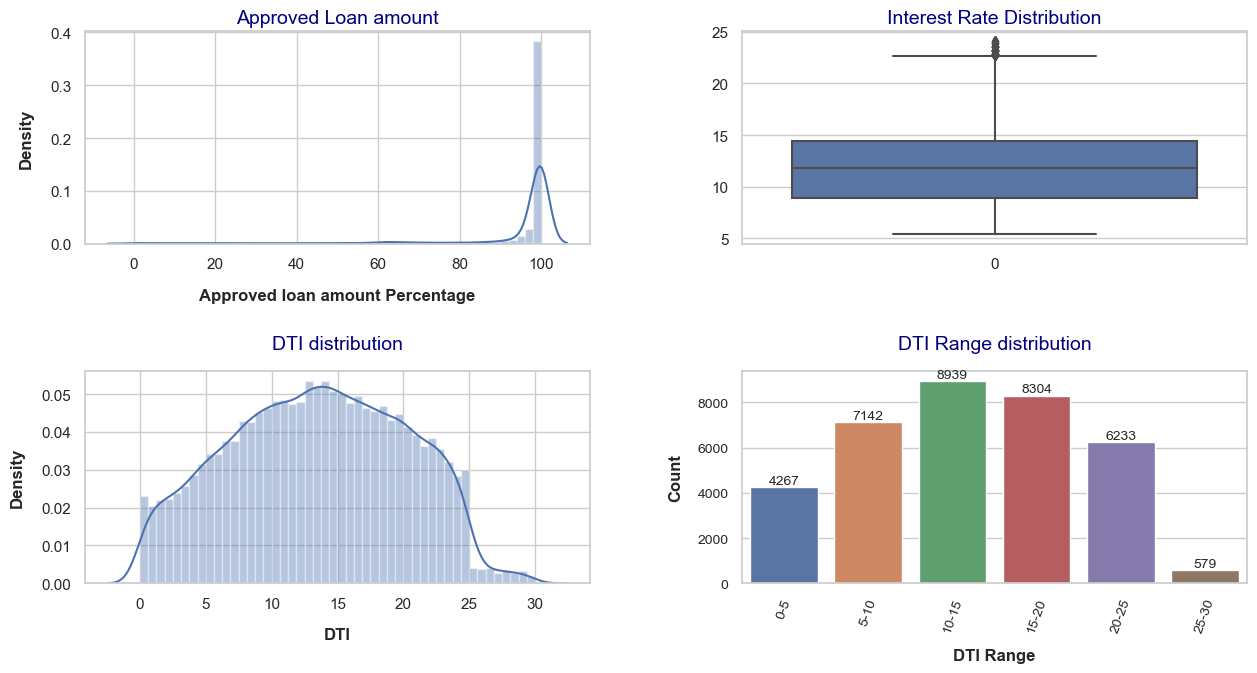

In [931]:
#----------------------------------- Analyze approved loan amount and Interest Rate Distribution ---------------------

plt.figure(figsize=(15,8))
plt.subplots_adjust(top = 0.70, bottom=0.01, hspace=0.6, wspace=0.3)

#Approved loan amount distribution
plt.subplot(2,2,1)
sns.distplot(loan_df['approved_loan_amt_percent'])
plt.title('Approved Loan amount',fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.xlabel("Approved loan amount Percentage",fontweight='bold',fontsize=12)
plt.ylabel('Density',fontweight='bold',fontsize=12)
plt.rc('axes', titlesize=14,labelpad=12)   
plt.rc('axes', labelsize=12,labelpad=12)  

#Interest Rate distribution
plt.subplot(2,2,2)
sns.boxplot(data=loan_df['int_rate'])
plt.title('Interest Rate Distribution',fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=14,labelpad=12)   
plt.rc('axes', labelsize=12,labelpad=12)  


#DTI Distribution
plt.subplot(2,2,3)
sns.distplot(loan_df['dti'])
plt.xlabel("DTI",fontweight='bold')
plt.ylabel('Density',fontweight='bold')
plt.title('DTI distribution',pad=16, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})



#DTI Distribution - Visualized in Bins
plt.subplot(2,2,4)
barplotresult = sns.countplot(data=loan_df, x='dti_bin')
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=10)
plt.xlabel("DTI Range",labelpad=10,fontweight='bold')
plt.ylabel('Count',labelpad=10,fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=70)
plt.rc('axes', titlesize=12)   
plt.rc('axes', labelsize=10)   
plt.title('DTI Range distribution',pad=16, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})

plt.show()

In [932]:
#Observations: 
# More than 80% of Borrowers got 100% loan amount from investors.
# Most of the interest rate lies between 9% to 14%
# DTI of most of the borrowers are in the range 10 - 20

> <font color='#006400' size=4.8><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> 1. About 85% of the borrowers have fully paid the loan whereas around 15% are defaulters. </font>
</br>
> <font size=3.5> 2. Majority purpose for taking the loan is for debt consolidation and paying credit card bills.</font>
</br>
> <font size=3.5> 3. Loan approved to the borrowers in the category E,F and G grades are very less. (As expected) </font>
</br>
> <font size=3.5> 4. Lending club has expanded year by year, every year the number of loans are almost doubled. </font>
</br>
> <font size=3.5> 5. Majority of loans is against the home ownership Rent when compared to Mortgage. Own house is comparatively very less </font>
</br>
> <font size=3.5> 6. Almost 43% of the loans is under 'Not verfied' category where in annual income of the borrower is not verified </font>
</br>
> <font size=3.5> 7. Undoubtedly loan is given for borrower with no derogatory public records and no public record bankruptcies. Only very few exceptions can be seen </font>
</br>
> <font size=3.5> 8. Number of loans for 10+ years of employment length is more than other categories.</font>
</br>
> <font size=3.5> 9. Most of the borrowers would go for 36 months loan period (75%) rather than 60 months (25%). </font>
</br>
> <font size=3.5> 10. Most of the borrowers annual income is in the range of 20k to 80k. </font>
</br>
> <font size=3.5> 11. Most of the borrowers have taken loan between 5000 to 10000 .</font>
</br>
> <font size=3.5> 12. Amount distribution looks very similar across loan_amnt, funded_amnt and funded_amnt_inv </font>
</br>
> <font size=3.5> 13. More than 80% of Borrowers got 100% loan amount from investors. </font>
</br>
> <font size=3.5> 14. Majority of interest rate lies between 9% to 14%</font>
</br>
> <font size=3.5> 15. DTI of most of the borrowers are in the range 10 - 20 </font>
</br>
</br>

#### <font color='#000080' size=5>***5. Segmented Univariate Analysis:***</font>

#### <font color='#52595D' size=3.2>5.1 Analysis of loan status with term of loan</font>

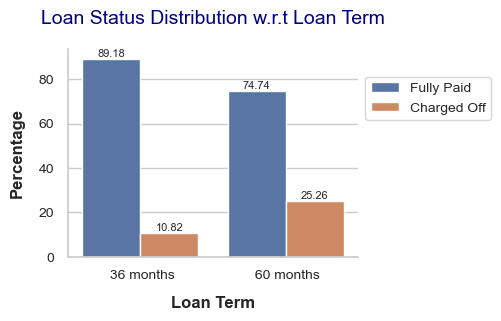

In [933]:
#------------------ Analysis of loan status with term of loan --------------------------
#Better to represent data in percentages for easy interpretation

plt.figure(figsize=(5,5))
termdf = loan_df.groupby('term')['loan_status'].value_counts(normalize=True).mul(100).round(2).reset_index()
g=sns.catplot( x="term", y="proportion", hue="loan_status", data= termdf ,kind="bar",height=3, aspect=4/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Loan Term",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Percentage',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)
plt.title('Loan Status Distribution w.r.t Loan Term',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

In [934]:
#Observations:
#Loan applicants applying loan for 60 months are likely to default more than the one taking loan for 36 months

#### <font color='#52595D' size=3.2>5.2 Analysis of loan status with Grades</font>

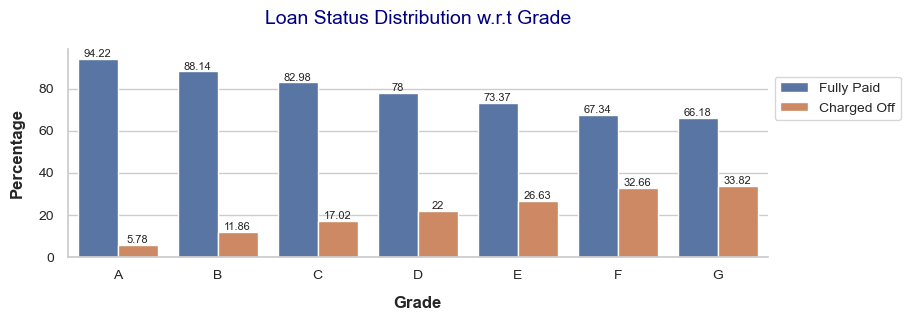

In [935]:
#------------------ Analysis of loan status with Grades --------------------------
#Better to represent data in percentages for easy interpretation

plt.figure(figsize=(5,5))
termdf = loan_df.groupby('grade')['loan_status'].value_counts(normalize=True).mul(100).round(2).reset_index()
g=sns.catplot( x="grade", y="proportion", hue="loan_status", data= termdf ,kind="bar",height=3, aspect=8/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Grade",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Percentage',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)  
plt.title('Loan Status Distribution w.r.t Grade',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

In [936]:
#Observations:
#Higher the Grade, higher the rate of defaulters

#### <font color='#52595D' size=3.2>5.3  Analysis of loan status with verification_status and annual income of borrower</font>

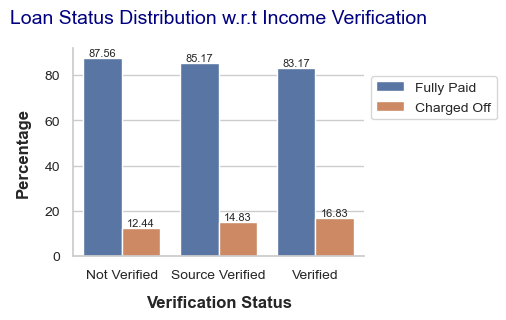

In [937]:
#------------------ Analysis of loan status with verification_status and annual income of borrower--------------------------
#Better to represent data in percentages for easy interpretation

plt.figure(figsize=(5,5))
df = loan_df.groupby('verification_status')['loan_status'].value_counts(normalize=True).mul(100).round(2).reset_index()
g=sns.catplot( x="verification_status", y="proportion", hue="loan_status", data= df ,kind="bar",height=3, aspect=4/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Verification Status",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Percentage',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)  
plt.title('Loan Status Distribution w.r.t Income Verification',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

In [938]:
#Observations:
#The loan applicants who have been verified are defaulting more than the applicants who are not verified.

#### <font color='#52595D' size=3.2>5.4 Analysis of loan status with State</font>

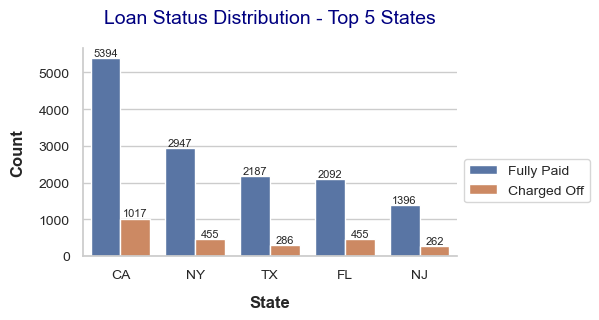

In [982]:
#------------------ Analysis of loan status with State --------------------------
#------------------------ Find Top 5 states with maximum Defaulters ----------------------
plt.figure(figsize=(5,5))

df = loan_df.groupby('addr_state')['loan_status'].value_counts().reset_index()
defaulterDF = df[df.loan_status == 'Charged Off'].sort_values(by='count', ascending=False).head(5)
HighDefaulterStates = defaulterDF['addr_state']
list1 = list(HighDefaulterStates.values)
newdf = df[df['addr_state'].isin(list1)].sort_values(by='count', ascending=False)

g=sns.catplot( x="addr_state", y="count", hue="loan_status", data= newdf ,kind="bar",height=3, aspect=5/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("State",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Count',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)  
plt.title('Loan Status Distribution - Top 5 States',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.5), fontsize=10)
plt.close(1)
plt.show()

In [940]:
#Observations:
#Top 5 states with Maximum defaulters are : CA, NY, FL, TX and NJ

#### <font color='#52595D' size=3.2>5.5 Analysis of loan status with home_ownership</font>

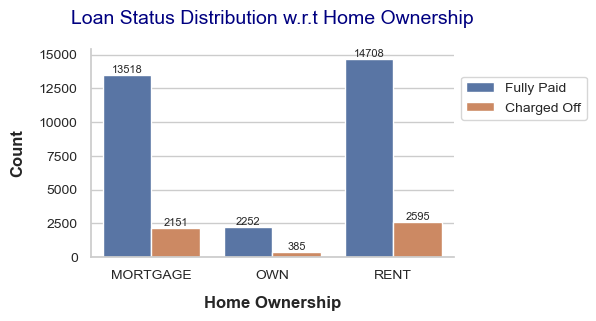

In [941]:
#------------------ Analysis of loan status with home_ownership --------------------------
plt.figure(figsize=(5,5))
df = loan_df.groupby('home_ownership')['loan_status'].value_counts().reset_index()
g=sns.catplot( x="home_ownership", y="count", hue="loan_status", data= df ,kind="bar",height=3, aspect=5/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Home Ownership",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Count',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10) 
plt.title('Loan Status Distribution w.r.t Home Ownership',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

In [942]:
#Observations:
#The loan applicants who live in a rented or mortgaged house are more likely to default

#### <font color='#52595D' size=3.2>5.6 Analyze loan status issue_year</font>

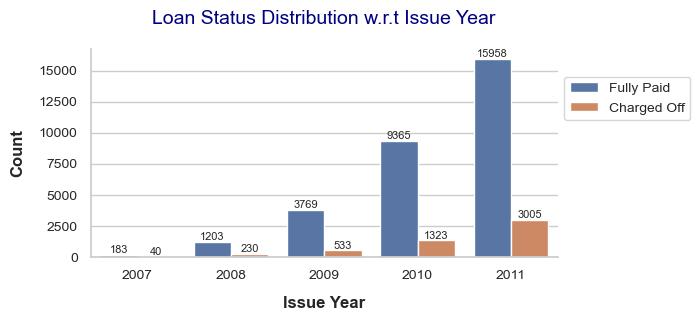

In [943]:
#------------------ Analysis of loan status with issue_year - Based on count  --------------------------
plt.figure(figsize=(5,5))
df = loan_df.groupby('issue_year')['loan_status'].value_counts().reset_index()
g=sns.catplot( x="issue_year", y="count", hue="loan_status", data= df ,kind="bar",height=3, aspect=6/3)
barplotresult = g.facet_axis(0, 0) 
barplotresult.set_xticklabels(tickLabels)
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Issue Year",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Count',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)   
plt.title('Loan Status Distribution w.r.t Issue Year',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

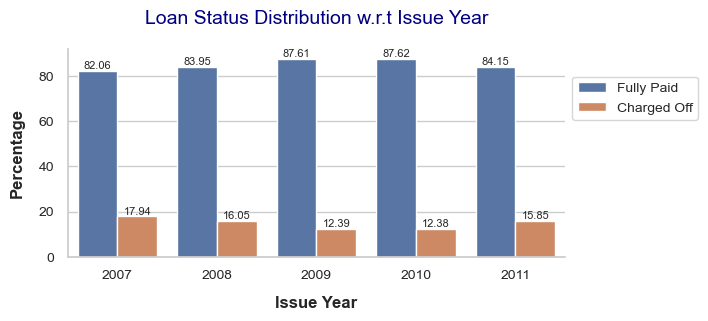

In [944]:
#------------------ Analysis of loan status with issue_year - Based on distribution % --------------------------
#Better to represent data in percentages for easy interpretation

plt.figure(figsize=(5,5))
df = loan_df.groupby('issue_year')['loan_status'].value_counts(normalize=True).mul(100).round(2).reset_index()
g=sns.catplot( x="issue_year", y="proportion", hue="loan_status", data= df ,kind="bar",height=3, aspect=6/3)
barplotresult = g.facet_axis(0, 0) 
barplotresult.set_xticklabels(tickLabels)
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Issue Year",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Percentage',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10) 
plt.title('Loan Status Distribution w.r.t Issue Year',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

In [945]:
#Observations:
#The loan applicants have increased steadily from 2007 to 2011 showcasing positive trend in the upcoming years.
#Though we see a exponential increase in number of defaulters over the years, when analyzed in terms of percentage distribution, we see that there is no huge variation in deafaulter% with the years

#### <font color='#52595D' size=3.2>5.7 Analyze loan status with issue_month</font>

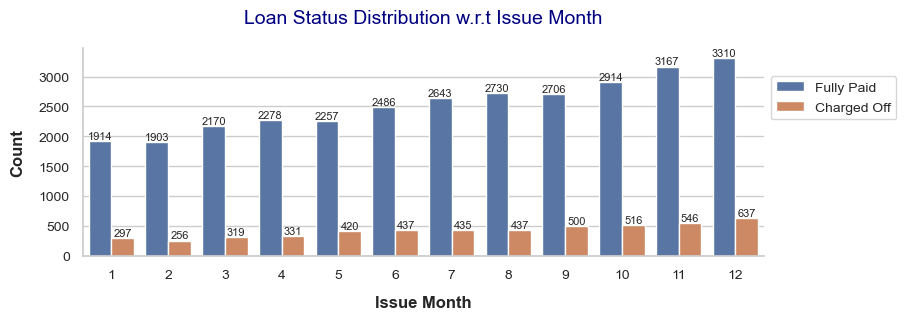

In [946]:
#------------------ Analysis of loan status with issue_month --------------------------

plt.figure(figsize=(5,5))
#df = loan_df.groupby('issue_month')['loan_status'].value_counts(normalize=True).mul(100).round(2).reset_index()
df = loan_df.groupby('issue_month')['loan_status'].value_counts().reset_index()
g=sns.catplot( x="issue_month", y="count", hue="loan_status", data= df ,kind="bar",height=3, aspect=8/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Issue Month",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Count',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)
plt.title('Loan Status Distribution w.r.t Issue Month',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

In [947]:
#Observations:
#Defaulter rate is high in the last quarter of the year

#### <font color='#52595D' size=3.2>5.8 Analysis of loan status with emp_length</font>

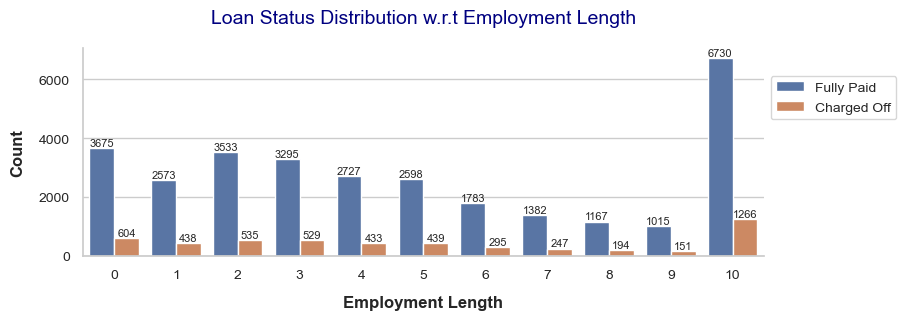

In [948]:
#------------------ Analysis of loan status with emp_length - Based on Count --------------------------
plt.figure(figsize=(5,5))
df = loan_df.groupby('emp_length')['loan_status'].value_counts().reset_index()
g=sns.catplot( x="emp_length", y='count', hue="loan_status", data= df ,kind="bar", height=3, aspect=8/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Employment Length",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Count',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)  
plt.title('Loan Status Distribution w.r.t Employment Length',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

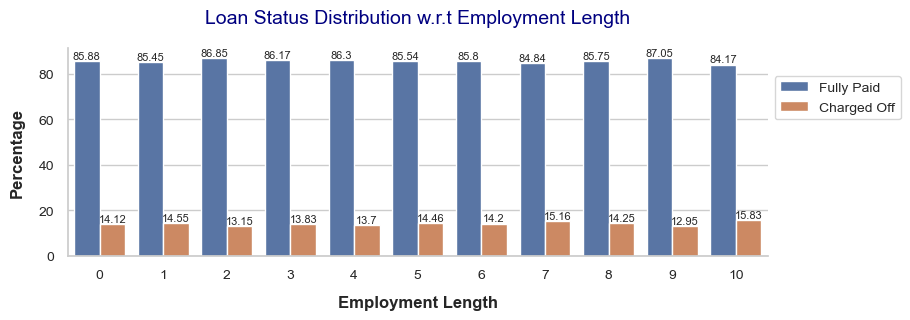

In [949]:
#------------------ Analysis of loan status with emp_length - Based on Percentage Distribution --------------------------
#Better to represent data in percentages for easy interpretation

plt.figure(figsize=(5,5))
df = loan_df.groupby('emp_length')['loan_status'].value_counts(normalize=True).mul(100).round(2).reset_index()
g=sns.catplot( x="emp_length", y="proportion", hue="loan_status", data= df ,kind="bar", height=3, aspect=8/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Employment Length",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Percentage',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)
plt.title('Loan Status Distribution w.r.t Employment Length',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

In [950]:
#Observations:
#Most number of loan applicants are 10 or more years of experience. They also are the ones who are most likely to default. 
#However, when analyzed in terms of percentage distribution, we see that there is no huge variation in deafaulter% with the employment length

#### <font color='#52595D' size=3.2>5.9 Analysis of loan status with purpose</font>

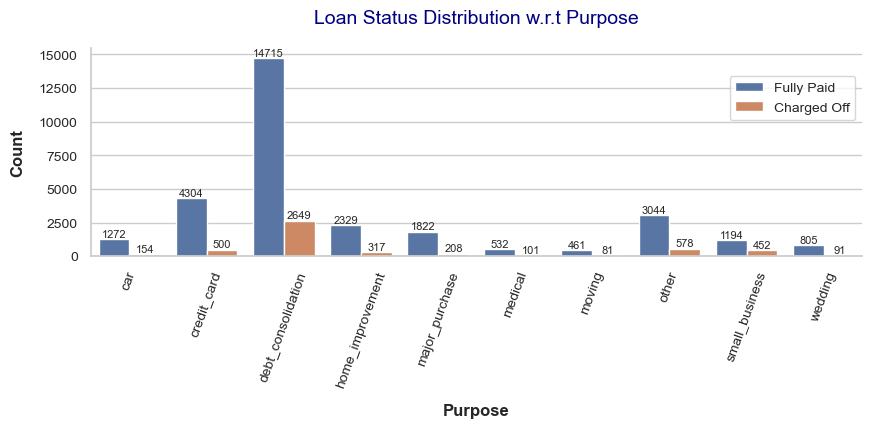

In [951]:
#------------------ Analysis of loan status with purpose - Based on number of defaulters --------------------------
plt.figure(figsize=(5,5))
df = loan_df.groupby('purpose')['loan_status'].value_counts().reset_index()
g=sns.catplot( x="purpose", y="count", hue="loan_status", data= df ,kind="bar", height=3, aspect=9/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Purpose",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Count',labelpad=10,fontweight='bold',fontsize=12)
plt.xticks(rotation=70)
g.tick_params(labelsize=10)  
plt.title('Loan Status Distribution w.r.t Purpose',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

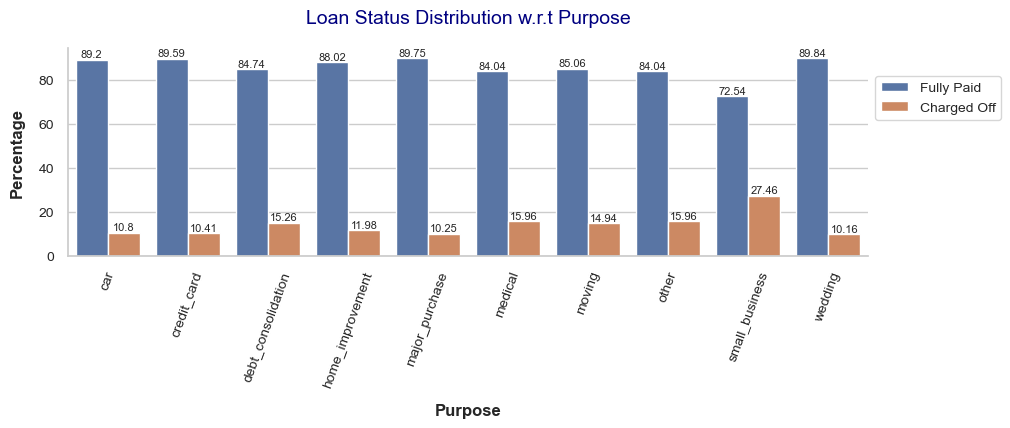

In [952]:
#------------------ Analysis of loan status with purpose --------------------------
#Better to represent data in percentages for easy interpretation

plt.figure(figsize=(5,5))
df = loan_df.groupby('purpose')['loan_status'].value_counts(normalize=True).mul(100).round(2).reset_index()
g=sns.catplot( x="purpose", y="proportion", hue="loan_status", data= df ,kind="bar", height=3, aspect=9/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Purpose",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Percentage',labelpad=10,fontweight='bold',fontsize=12)
plt.xticks(rotation=70)
g.tick_params(labelsize=10)  
plt.title('Loan Status Distribution w.r.t Purpose',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

In [953]:
#Observations:
#Debt consolidation is the category where maximum loans are issued and people have defaulted the most in the same category.
#However, when analyzed in terms of percentage we see most of the defaulters under the category small_business, medical and debt_consolidation
#Also, we can see less defaulters under the purpose category of car and wedding

#### <font color='#52595D' size=3.2>5.10 Analysis of loan status with annual income of borrower</font>

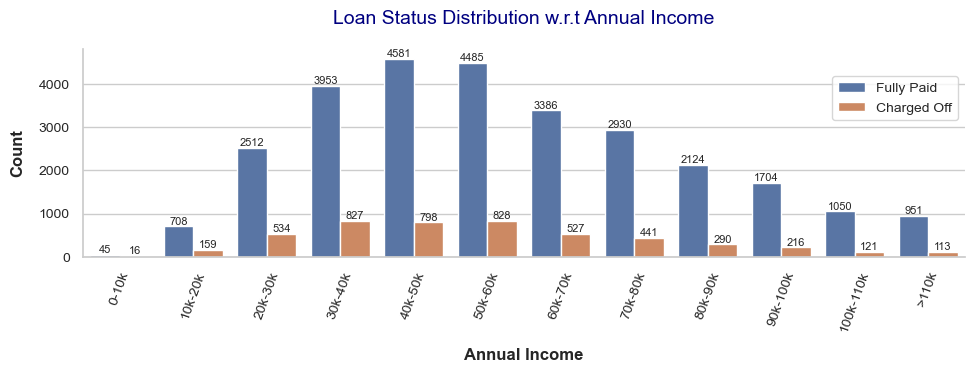

In [954]:
#------------------ Analysis of loan status with annual income of borrower--------------------------
plt.figure(figsize=(15,5))
df = loan_df.groupby('annual_inc_bin')['loan_status'].value_counts().reset_index()
g=sns.catplot( x="annual_inc_bin", y="count", hue="loan_status", data= df ,kind="bar",height=3, aspect=10/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Annual Income",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Count',labelpad=10,fontweight='bold',fontsize=12)
plt.xticks(rotation=70)
g.tick_params(labelsize=10)
plt.title('Loan Status Distribution w.r.t Annual Income',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

In [955]:
#Observations:
#Majority of the loan applicants who charged off, reported an annual income between 30k to 60k

#### <font color='#52595D' size=3.2>5.11 Analysis of loan status with Loan amount</font>

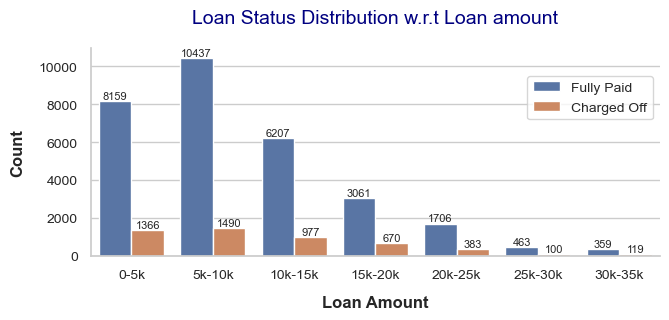

In [985]:
#------------------ Analysis of loan status with Loan amount--------------------------
plt.figure(figsize=(5,5))
df = loan_df.groupby('funded_amnt_bin')['loan_status'].value_counts().reset_index()
g=sns.catplot( x="funded_amnt_bin", y="count", hue="loan_status", data= df ,kind="bar",height=3, aspect=7/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Loan Amount",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Count',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10) 
plt.title('Loan Status Distribution w.r.t Loan amount',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

In [957]:
#Observations:
#We see that Defaulter rate is high for higher loan amount

#### <font color='#52595D' size=3.2>5.12  Analysis of loan status with DTI</font>

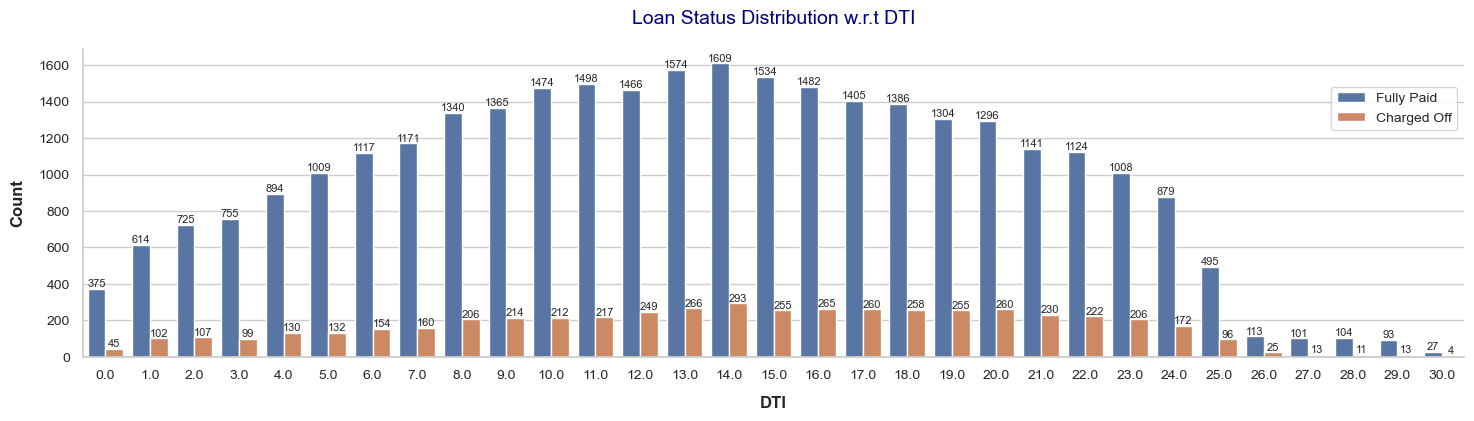

In [958]:
#------------------ Analysis of loan status with DTI--------------------------

plt.figure(figsize=(5,5))
df = loan_df.groupby(round(loan_df.dti,0))['loan_status'].value_counts().reset_index()
g=sns.catplot( x="dti", y="count", hue="loan_status", data= df ,kind="bar",height=4, aspect=15/4)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("DTI",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Count',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)   
plt.title('Loan Status Distribution w.r.t DTI',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

In [959]:
#Observations:
#Majority of loan applicants who charged off has Debt-to-Income (DTI) ratio in the range 8-23

#### <font color='#52595D' size=3.2>5.13 Analysis of loan status with Interest Rate</font>

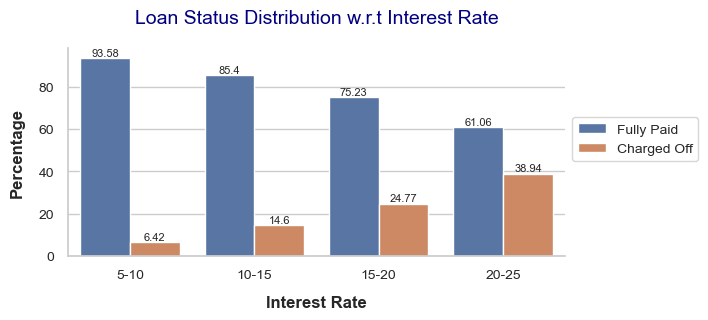

In [960]:
#------------------ Analysis of loan status with Interest Rate--------------------------
#Better to represent data in percentages for easy interpretation

plt.figure(figsize=(5,5))
df = loan_df.groupby('int_rate_bin')['loan_status'].value_counts(normalize=True).mul(100).round(2).reset_index()
g=sns.catplot( x="int_rate_bin", y="proportion", hue="loan_status", data= df ,kind="bar",height=3, aspect=6/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Interest Rate",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Percentage',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)  
plt.title('Loan Status Distribution w.r.t Interest Rate',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.7), fontsize=10)
plt.close(1)
plt.show()

In [961]:
#Observations:
#We see that defaulters rate increases with the rise in interest rate

#### <font color='#52595D' size=3.2>5.14 Analysis of loan status with Revolving line utilization rate</font>

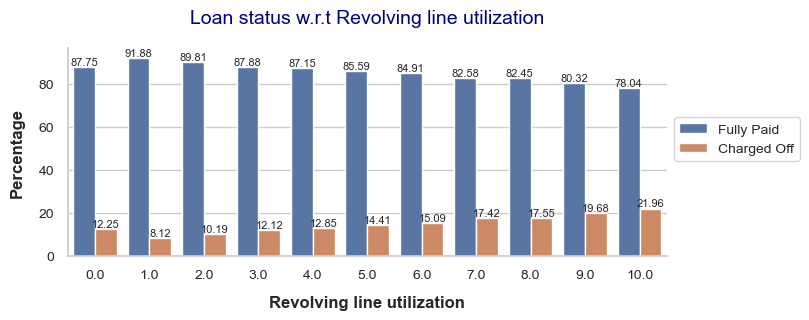

In [962]:
#------------------ Analysis of loan status with Revolving line utilization rate --------------------------
#Better to represent data in percentages for easy interpretation

plt.figure(figsize=(5,5))
df = loan_df.groupby(round(loan_df.revol_util/10,0))['loan_status'].value_counts(normalize=True).mul(100).round(2).reset_index()
g=sns.catplot( x="revol_util", y="proportion", hue="loan_status", data= df ,kind="bar",height=3, aspect=7/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Revolving line utilization",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Percentage',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)
plt.title('Loan status w.r.t Revolving line utilization',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.7), fontsize=10)
plt.close(1)
plt.show()

In [963]:
#Observations:
#We see that higher the revolving line utilization rate, higher the chance of defaulting

#### <font color='#52595D' size=3.2>5.15 Analysis of Interest rate accross various grades</font>

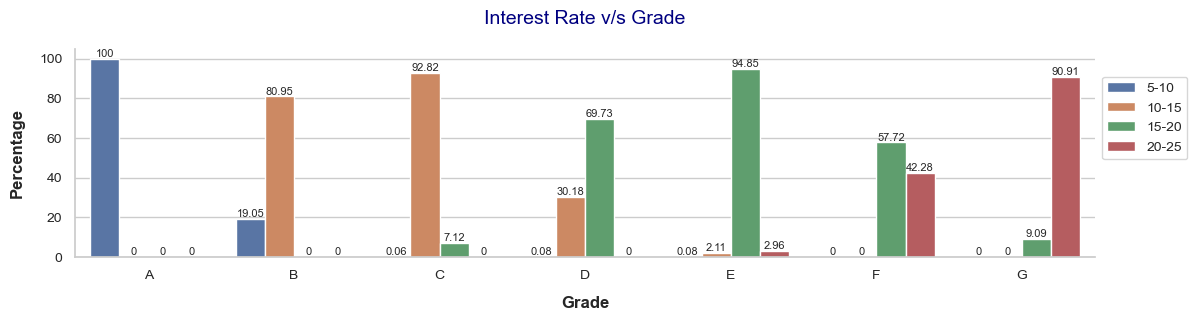

In [964]:
#------------------ Analysis of Interest rate accross various grades -----------------
#Better to represent data in percentages for easy interpretation

plt.figure(figsize=(5,5))
df = loan_df.groupby('grade')['int_rate_bin'].value_counts(normalize=True).mul(100).round(2).reset_index()
g=sns.catplot( x="grade", y="proportion", hue="int_rate_bin", data= df ,kind="bar",height=3, aspect=15/4)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Grade",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Percentage',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)
plt.title('Interest Rate v/s Grade',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=10)
plt.close(1)
plt.show()

In [965]:
#Observations
#Loan applicants with higher grade has been given the loan with high interest rates

#### <font color='#52595D' size=3.2>5.16 Analysis of interest rate with term of loan</font>

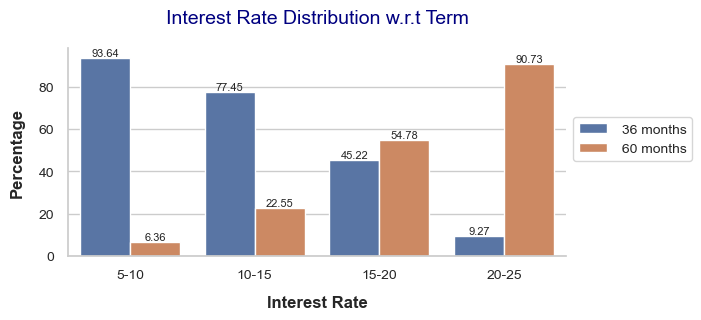

In [966]:
#------------------ Analysis of interest rate with term of loan --------------------------
#Better to represent data in percentages for easy interpretation

plt.figure(figsize=(5,5))
df = loan_df.groupby('int_rate_bin')['term'].value_counts(normalize=True).mul(100).round(2).reset_index()
g=sns.catplot( x="int_rate_bin", y="proportion", hue="term", data= df ,kind="bar",height=3, aspect=6/3)
barplotresult = g.facet_axis(0, 0) 
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Interest Rate",labelpad=10,fontweight='bold',fontsize=12)
plt.ylabel('Percentage',labelpad=10,fontweight='bold',fontsize=12)
g.tick_params(labelsize=10)  
plt.title('Interest Rate Distribution w.r.t Term',pad=18, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g._legend.remove()
plt.legend(bbox_to_anchor=(1.0, 0.7), fontsize=10)
plt.close(1)
plt.show()

In [967]:
#Observations:
#Interest Rate is less for 36 months when compared to 60 months

> <font color='#006400' size=4.8><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> 1. Loan applicants applying loan for 60 months are likely to default more than the one taking loan for 36 months.</font>
</br>
> <font size=3.5> 2. Higher the Grade, higher the rate of defaulters.</font>
</br>
> <font size=3.5> 3. The loan applicants who have been verified are defaulting more than the applicants who are not verified.</font>
</br>
> <font size=3.5> 4. Top 5 states with Maximum defaulters are : CA, NY, FL, TX and NJ.</font>
</br>
> <font size=3.5> 5. The loan applicants who live in a rented or mortgaged house are more likely to default.</font>
</br>
> <font size=3.5> 6. The loan applicants have increased steadily from 2007 to 2011 showcasing positive trend in the upcoming years.</font>
</br>
> <font size=3.5> 7. Though we see a exponential increase in number of defaulters over the years, when analyzed in terms of percentage distribution, we see that there is no huge variation in deafaulter% with the years.</font>
</br>
> <font size=3.5> 8. Defaulter rate is high in the last quarter of the year.</font>
</br>
> <font size=3.5> 9. Most number of loan applicants are 10 or more years of experience. They also are the ones who are most likely to default. However, when analyzed in terms of percentage distribution, we see that there is no huge variation in deafaulter% with the employment length.</font>
</br>
> <font size=3.5> 10. Debt consolidation is the category where maximum loans are issued and people have defaulted the most in the same category. However, when analyzed in terms of percentage we see most of the defaulters under the category small_business, medical and debt_consolidation; Less defaulters under the purpose category of car and wedding.</font>
</br>
> <font size=3.5> 11. Majority of the loan applicants who charged off, reported an annual income between 30k to 60k.</font>
</br>
> <font size=3.5> 12. Defaulter rate is high for higher loan amount.</font>
</br>
> <font size=3.5> 13. Majority of loan applicants who charged off has Debt-to-Income (DTI) ratio in the range 8-23.</font>
</br>
> <font size=3.5> 14. We see that defaulters rate increases with the rise in interest rate.</font>
</br>
> <font size=3.5> 15. We see that higher the revolving line utilization rate, higher the chance of defaulting.</font>
</br>
> <font size=3.5> 16. Loan applicants with higher grade has been given the loan with high interest rates.</font>
</br>
> <font size=3.5> 17. Interest Rate is less for 36 months when compared to 60 months.</font>
</br>
</br>

#### <font color='#000080' size=5>***6. Bivariate Analysis:***</font>

#### <font color='#52595D' size=3.2>6.1 Analysis of loan status with issue_year and loss incurred</font>

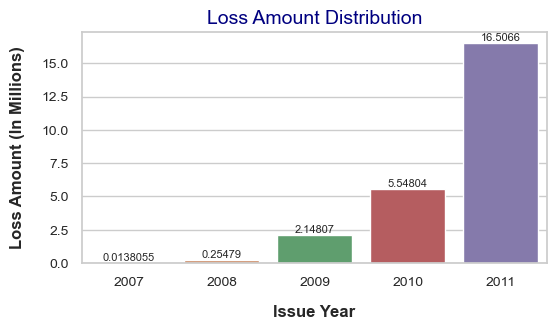

In [968]:
#------------------ Analysis of loan status with issue_year - Based on count  --------------------------
plt.figure(figsize=(6,3))
ChargedOffdf = loan_df[loan_df['loan_status']=='Charged Off']
df = ChargedOffdf.groupby('issue_year')['loss_amnt'].sum().reset_index()
df['loss_amnt'] = df['loss_amnt']/1000000
barplotresult = sns.barplot(data=df, x="issue_year", y="loss_amnt")
barplotresult.set_xticklabels(tickLabels)
barplotresult.tick_params(labelsize=10)
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Issue Year",fontweight='bold',fontsize=12)
plt.ylabel('Loss Amount (In Millions)',fontweight='bold',fontsize=12)
plt.title('Loss Amount Distribution',fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=10,labelpad=12)   
plt.rc('axes', labelsize=10,labelpad=12)  

plt.show()

In [969]:
#Observation:
#With respect to Issue year, these are the analysis
#1. There is a increase in number of defaulters over the years from 2007 and could see maximum number of defaulters in 2011
#2. Percentage distribution of number of defaulters v/s fully paid in each year, almost remains the same.
#3. We could see steady increase in the amount loss because of loan defaults from 2007 to 2010 but peaking very high in 2011.

#### <font color='#52595D' size=3.2>6.2 Analyze Interest Rate and Loan Grade</font>

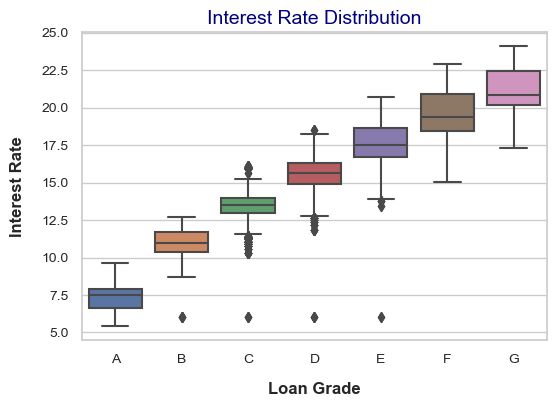

In [970]:
plt.figure(figsize=(6,4))
gradeList = list(loan_df.groupby('grade').groups.keys())
order_list = sorted(gradeList)
g = sns.boxplot(x='grade', y='int_rate', data=loan_df, order=order_list)
plt.title('Interest Rate Distribution',fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g.tick_params(labelsize=10)
plt.xlabel('Loan Grade',fontweight='bold',fontsize=12)
plt.ylabel('Interest Rate',fontweight='bold',fontsize=12)
plt.show()

In [971]:
#Observations:
#Higher the Grade of the loan applicant, higher is the interest rate

#### <font color='#52595D' size=3.2>6.3 Interest Rate across amount loss</font>

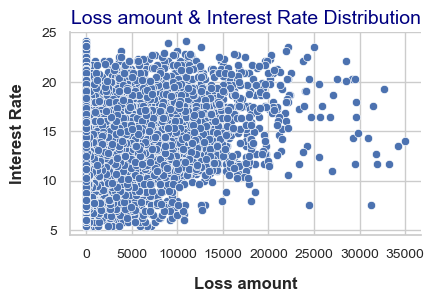

In [972]:
#Interest Rate distribution across credit loss
g = sns.relplot(x="loss_amnt", y="int_rate", data=loan_df, kind='scatter',height=3, aspect=6/4);
plt.xlabel("Loss amount",fontweight='bold',fontsize=12)
plt.ylabel('Interest Rate',fontweight='bold',fontsize=12)
plt.title('Loss amount & Interest Rate Distribution',fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g.tick_params(labelsize=10)  
plt.show()

In [973]:
#Observations:
#Majority of the defaulters are with loan amount < 15k and with interest rate in the range 10 to 20%

#### <font color='#52595D' size=3.2>6.4 Analysis of Loan amount with Interest rate provided for public derogatory records applicants </font>

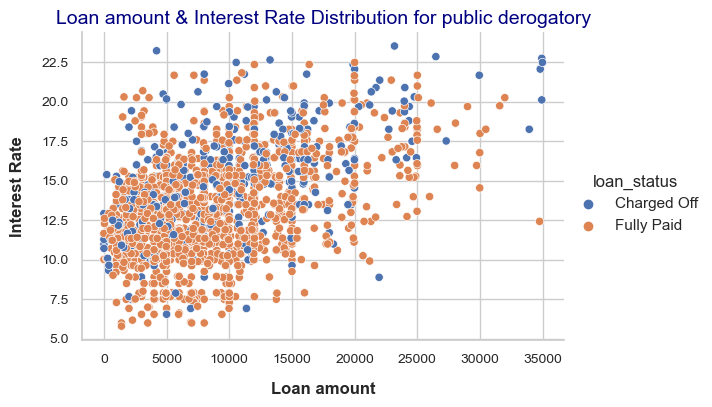

In [974]:
filtereddf =  loan_df[loan_df['pub_rec'] > 0]
g=sns.relplot(x="funded_amnt_inv", y="int_rate", data=filtereddf, kind='scatter',hue="loan_status",height=4, aspect=6/4);
plt.xlabel("Loan amount",fontweight='bold',fontsize=12)
plt.ylabel('Interest Rate',fontweight='bold',fontsize=12)
plt.title('Loan amount & Interest Rate Distribution for public derogatory',fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g.tick_params(labelsize=10)
plt.show()

In [975]:
#Observations:
#For the applicants with public derogatory records, loan provided for higher amount is mostly resulted in defaults.

#### <font color='#52595D' size=3.2>6.5 Analysis of Interest Rate across DTI</font>

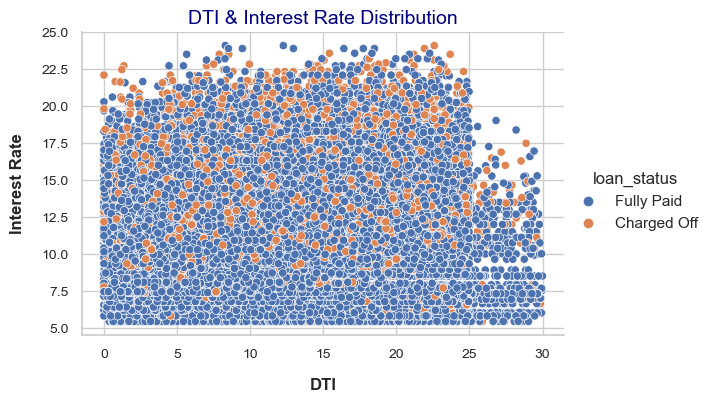

In [976]:
g=sns.relplot(x="dti", y="int_rate", data=loan_df, hue="loan_status",kind='scatter',height=4, aspect=6/4);
plt.xlabel("DTI",fontweight='bold',fontsize=12)
plt.ylabel('Interest Rate',fontweight='bold',fontsize=12)
plt.title('DTI & Interest Rate Distribution',fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g.tick_params(labelsize=10) 
plt.show()

In [977]:
#Observations:
#Higher interest rate should be charged for higher dti. However we could see that data is spread all across.

#### <font color='#52595D' size=3.2>6.6 Co-relation Matrix on numeric variables</font>

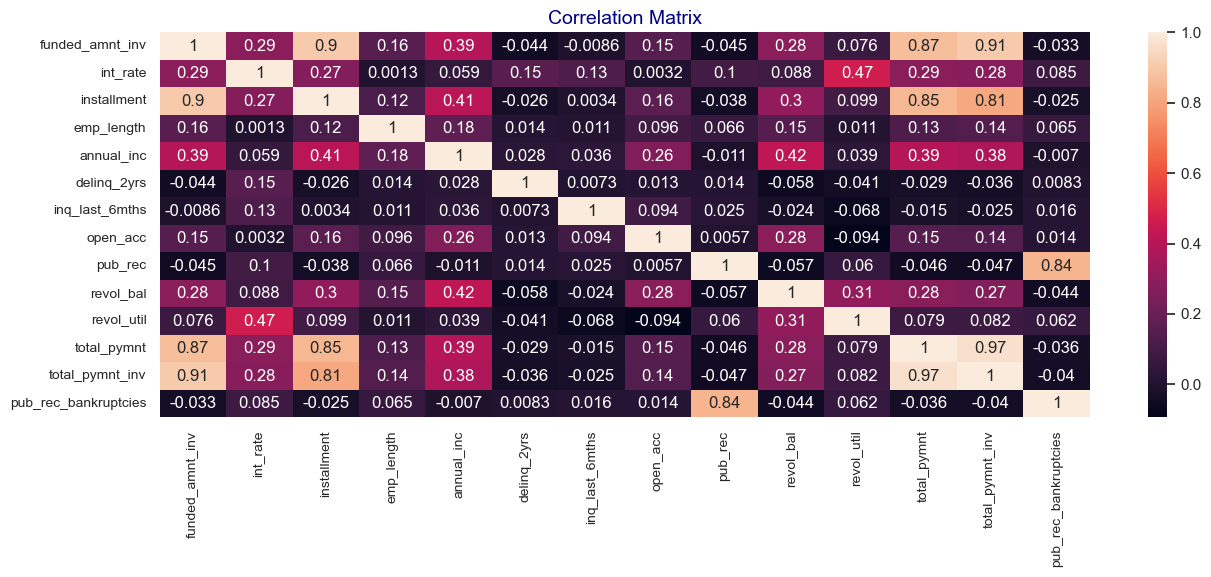

In [978]:
plt.figure(figsize=(15,5))
corrdf = loan_df[['funded_amnt_inv','int_rate','installment','emp_length','annual_inc',
                 'delinq_2yrs','inq_last_6mths','open_acc','pub_rec',
                 'revol_bal','revol_util','total_pymnt','total_pymnt_inv','pub_rec_bankruptcies']]
g=sns.heatmap(corrdf.corr(),cmap="rocket", annot=True)
#YlGnBu
plt.title('Correlation Matrix',fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
g.tick_params(labelsize=10)
plt.show()

In [979]:
#Observations:
# Interest Rate is high if Revolving line utilization rate is high
# Applicants with high annual income is approved with high amount loans.
# Total credit revolving balance is found to be high for applicants with high annual income

> <font color='#006400' size=4.8><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> 1. We could see steady increase in the amount loss because of loan defaults from 2007 to 2010 but peaking very high in 2011. </font>
</br>
> <font size=3.5> 2. Higher the Grade of the loan applicant, higher is the interest rate</font>
</br>
> <font size=3.5> 3. Majority of the defaulters are with loan amount < 15k and with interest rate in the range 10 to 20%</font>
</br>
> <font size=3.5> 4. For the applicants with public derogatory records, loan provided for higher amount is mostly resulted in defaults.</font>
</br>
> <font size=3.5> 5. Higher interest rate should be charged for higher dti. However we could see that data is spread all across.</font>
</br>
> <font size=3.5> 6. Interest Rate is high if Revolving line utilization rate is high</font>
</br>
> <font size=3.5> 7. Applicants with high annual income is approved with high amount loans.</font>
</br>
> <font size=3.5> 8. Total credit revolving balance is found to be high for applicants with high annual income</font>
</br>
</br>

In [980]:
#---------------------------Final Inferences from Exploratory Data Analysis on Lending Club Case study ------------------

> <font color='#006400' size=4.8><span style="text-decoration:underline">***Inferences:***</span></br></font>
> </br>
> <font size=3.5>1. Borrowers who have chosen long term repayment like 60 months are more likely to default than for short term repayments as the interest rate is also high. Lending company should consider evaluating the risk associated with longer-term loans and potentially either limit the maximum term or adjust interest rates accordingly. </font>
> </br>
> </br>
> <font size=3.5>2. Applicants who had been employed for more than 10 years accounted for the highest number of "Charged off" loans. However, when analyzed in terms of percentage distribution, we see that there is no huge variation in deafaulter% with the employment length. This indicates that long-term employment history does not necessarily guarantee successful loan repayment.</font>
> </br>
> </br>
> <font size=3.5>3. We could see steady increase in the credit loss because of loan defaults from 2007 to 2010 but peaking very high in 2011. This could be indicative of economic or financial challenges during that year or defining the start of new trend.</font>
> </br>
> </br>
> <font size=3.5>4. "Charged off" loans were predominantly taken during the last quarter, primarily in December. This peak in loan applications during the holiday season might suggest that financial pressures during the holidays contributed to loan defaults.</font>
> </br>
> </br>
> <font size=3.5>5. Top 5 states with Maximum defaulter rate are : CA, NY, FL, TX and NJ. Company should monitor regional risk trends and adjust lending strategies or rates accordingly in these areas.</font>
> </br>
> </br>
> <font size=3.5>6. 'Small_business', 'medical' and 'debt consolidation' are the loan purpose categories where the rate of defaulters is high. If the applicant is applying loan for one of these categories, lending company should scrutunize such applications as the probability of repayment is less.</font>
> </br>
> </br>
> <font size=3.5>7. Higher the grade we see high is the defaulter rate. Applicants with higher credit grade faced challenges in repaying their loans as the interest rate is high for higher grades. Lending company should reconsider on interest rate and have better evalution metrics on loan repayment for these high risk candidates.</font>
> </br>
> </br>
> <font size=3.5>8. Majority of "Charged off" loan participants, lived in rented and mortgaged houses. Lending company must assess the financial stability of these applicants, as they may be more susceptible to economic fluctuations.</font>
> </br>
> </br>
> <font size=3.5>9. Significant number of loan participants, around 15% were loan defaulters who were unable to clear their loans. The lending company should enhance risk assessment practices and  stricter credit checks. They can also offer financial education and support services to help borrowers manage their finances and improve loan repayment outcomes.</font>
> </br>
> </br>
> <font size=3.5>10. Majority of the defaulters are with loan amount less than 15k and with interest rate in the range 10 to 20%. The company should review its interest rate determination process and consider adjusting rates based on DTI ratios to better align with the borrower's ability to repay.</font>
> </br>
> </br>
> <font size=3.5>11. For the applicants with public derogatory records, loan provided with higher amount is mostly resulted in defaults. The company can mitigate this risk by conducting more thorough assessments for these applicants and potentially capping loan amounts for higher-risk applicants.</font>
> </br>
> </br>
> <font size=3.5>12. Majority of the loan applicants who charged off, reported an annual income between 30k to 60k and for loan amount less than 15k. The lending company should exercise caution when lending to low income individuals. They should implement rigorous income verification and assess repayment capacity more thoroughly for applicants in this income bracket.</font>
> </br>
> </br>
> <font size=3.5>13. Among loan participants who charged off ,considerable portion belonged to the interest rate bucket of 15%-25%. To reduce the risk of default, the lending company can consider offering loans at lower interest rates when possible.</font>
> </br>
> </br>
> <font size=3.5>14. The steady increase in the number of loan applicants from 2007 to 2011 indicates growth in the market. The company can capitalize on this trend by maintaining a competitive edge in the industry while keeping better risk management practices.</font>
> </br>
> </br>
> <font size=3.5>15. Verified loan applicants are defaulting more than those who are not verified. The company should review its verification process to ensure it effectively assesses applicant creditworthiness and consider improvements or adjustments.</font>
> </br>
> </br>
> <font size=3.5>16. Higher the revolving line utilization rate, higher the chance of defaulting. Lending company should consider revolving line utilization when approving loan and also recaliberate on interest rates.</font>
> </br>
> </br>